# Proyecto Wallapop

## 1. Importar bibliotecas.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast

from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import ttest_ind, mannwhitneyu
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    roc_curve
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE




## 2. Cargar el conjunto de datos

In [2]:
df = pd.read_csv('D:/Proyecto ironhack/files/spain_dataset.csv')
df.head()

C:\Users\marco\AppData\Local\Temp\ipykernel_20036\4099989062.py:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/Proyecto ironhack/files/spain_dataset.csv')


,id,type,content_id,title,storytelling,distance,user_id,kind,flag_pending,flag_sold,...,engine,gearbox,horsepower,favorited,creation_date,modification_date,supports_shipping,location.city,location.postal_code,location.country_code
0,4z4eqpmqwvjy,cars_search_cars,4z4eqpmqwvjy,Lynk & Co 01 1.5 PHEV 192 kW (261 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",5.0,xzo87r5ny769,normal,False,False,...,Eléctrico,automatic,261.0,False,2024-08-01T00:19:05.242+00:00,2024-08-06T11:00:26.671+00:00,False,Granada,18014,ES
1,qjw4qk8wpgzo,cars_search_cars,qjw4qk8wpgzo,CUPRA Leon 1.5 eTSI DSG 110 kW (150 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",5.0,xzo87r5ny769,normal,False,False,...,Gasolina,automatic,150.0,False,2024-08-02T00:15:58.196+00:00,2024-08-06T11:00:26.800+00:00,False,Granada,18014,ES
2,36e1el0ekqjd,cars_search_cars,36e1el0ekqjd,Volkswagen Polo R-Line 1.0 TSI 70 kW (95 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",5.0,xzo87r5ny769,normal,False,False,...,Gasolina,manual,95.0,False,2024-08-01T00:16:50.623+00:00,2024-08-06T11:00:27.227+00:00,False,Granada,18014,ES
3,4z4eqpmqxwjy,cars_search_cars,4z4eqpmqxwjy,Mercedes-Benz Clase CLA CLA 250 e 160 kW (218 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",5.0,xzo87r5ny769,normal,False,False,...,Eléctrico,automatic,218.0,False,2024-08-01T00:17:33.186+00:00,2024-08-06T11:00:26.633+00:00,False,Granada,18014,ES
4,36e1e2k4g8jd,cars_search_cars,36e1e2k4g8jd,Volkswagen Touran Advance 2.0 TDI 110 kW (150 ...,"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",5.0,xzo87r5ny769,normal,False,False,...,Diésel,automatic,150.0,False,2024-08-02T00:10:10.926+00:00,2024-08-06T11:00:26.709+00:00,False,Granada,18014,ES


In [3]:
df['location.postal_code'].unique()

array(['18014', '18210', '18194', ..., '15175', '15189', '15680'],
      dtype=object)

In [4]:
# Convertir la columna 'listings' de string a diccionario
# df['listings'] = df['listings'].apply(ast.literal_eval)

# Normalizar los datos JSON para expandir los diccionarios en columnas
# df = pd.json_normalize(df['listings'])

In [5]:
df.shape

(146616, 38)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146616 entries, 0 to 146615
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     146616 non-null  object 
 1   type                   146616 non-null  object 
 2   content_id             146616 non-null  object 
 3   title                  146616 non-null  object 
 4   storytelling           142237 non-null  object 
 5   distance               146616 non-null  float64
 6   user_id                146616 non-null  object 
 7   kind                   146616 non-null  object 
 8   flag_pending           146616 non-null  bool   
 9   flag_sold              146616 non-null  bool   
 10  flag_reserved          146616 non-null  bool   
 11  flag_banned            146616 non-null  bool   
 12  flag_expired           146616 non-null  bool   
 13  flag_onhold            146616 non-null  bool   
 14  flag_bumped            146616 non-nu

In [7]:
# Indentificamos los tipos de datos de las columnas.
df.dtypes

id                        object
type                      object
content_id                object
title                     object
storytelling              object
distance                 float64
user_id                   object
kind                      object
flag_pending                bool
flag_sold                   bool
flag_reserved               bool
flag_banned                 bool
flag_expired                bool
flag_onhold                 bool
flag_bumped                 bool
flag_highlighted            bool
flag_urgent                 bool
flag_country_bumped         bool
flag_boosted                bool
price                    float64
currency                  object
web_slug                  object
category_id                int64
brand                     object
model                     object
year                     float64
version                   object
km                       float64
engine                    object
gearbox                   object
horsepower

In [8]:
df.columns

Index(['id', 'type', 'content_id', 'title', 'storytelling', 'distance',
       'user_id', 'kind', 'flag_pending', 'flag_sold', 'flag_reserved',
       'flag_banned', 'flag_expired', 'flag_onhold', 'flag_bumped',
       'flag_highlighted', 'flag_urgent', 'flag_country_bumped',
       'flag_boosted', 'price', 'currency', 'web_slug', 'category_id', 'brand',
       'model', 'year', 'version', 'km', 'engine', 'gearbox', 'horsepower',
       'favorited', 'creation_date', 'modification_date', 'supports_shipping',
       'location.city', 'location.postal_code', 'location.country_code'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,146616.0,9.956328,3.567986e+00,1.0,7.0,10.0,13.0,15.0
price,146616.0,24412.794475,2.062741e+06,0.0,7800.0,14400.0,20900.0,602870597.0
category_id,146616.0,100.000000,0.000000e+00,100.0,100.0,100.0,100.0,100.0
year,146604.0,2014.901592,1.037095e+02,0.0,2012.0,2018.0,2021.0,20827.0
km,142080.0,127367.835614,1.213158e+06,0.0,52100.0,94774.0,156900.0,280000000.0
horsepower,142708.0,911.752418,2.406703e+05,-2.0,102.0,126.0,150.0,90290000.0


## 3. Limpieza de datos

In [10]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'id',
    'type',
    'flag_pending',
    'flag_sold',
    'flag_banned',
    'flag_expired',
    'flag_onhold',
    'flag_highlighted',
    'flag_urgent',
    'flag_boosted',
    'supports_shipping',
    'web_slug',
    'favorited',
    'kind',
    'category_id',
    'distance',
    'creation_date',
    'modification_date',
    'flag_reserved',
    'flag_country_bumped'
    
]

# Eliminación de las columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar)



In [11]:
df.columns

Index(['content_id', 'title', 'storytelling', 'user_id', 'flag_bumped',
       'price', 'currency', 'brand', 'model', 'year', 'version', 'km',
       'engine', 'gearbox', 'horsepower', 'location.city',
       'location.postal_code', 'location.country_code'],
      dtype='object')

In [12]:
# Diccionario de ejemplo de códigos postales a provincias (España como ejemplo)
postal_code_to_province = {
    '01': 'Álava', '02': 'Albacete', '03': 'Alicante', '04': 'Almería',
    '05': 'Ávila', '06': 'Badajoz', '07': 'Baleares', '08': 'Barcelona',
    '09': 'Burgos', '10': 'Cáceres', '11': 'Cádiz', '12': 'Castellón',
    '13': 'Ciudad Real', '14': 'Córdoba', '15': 'La Coruña', '16': 'Cuenca',
    '17': 'Gerona', '18': 'Granada', '19': 'Guadalajara', '20': 'Guipúzcoa',
    '21': 'Huelva', '22': 'Huesca', '23': 'Jaén', '24': 'León',
    '25': 'Lérida', '26': 'La Rioja', '27': 'Lugo', '28': 'Madrid',
    '29': 'Málaga', '30': 'Murcia', '31': 'Navarra', '32': 'Orense',
    '33': 'Asturias', '34': 'Palencia', '35': 'Las Palmas', '36': 'Pontevedra',
    '37': 'Salamanca', '38': 'Santa Cruz de Tenerife', '39': 'Cantabria',
    '40': 'Segovia', '41': 'Sevilla', '42': 'Soria', '43': 'Tarragona',
    '44': 'Teruel', '45': 'Toledo', '46': 'Valencia', '47': 'Valladolid',
    '48': 'Vizcaya', '49': 'Zamora', '50': 'Zaragoza', '51': 'Ceuta',
    '52': 'Melilla'
}

# Función para extraer la provincia
def get_province(postal_code):
    postal_code_str = str(postal_code).zfill(5)  # Asegurar que tenga 5 dígitos
    province_code = postal_code_str[:2]  # Extraer los primeros dos dígitos
    return postal_code_to_province.get(province_code, 'Desconocido')

# Aplicar la función a la columna de códigos postales
df['location.province'] = df['location.postal_code'].apply(get_province)

# Mostrar los primeros registros para verificar
df[['location.postal_code', 'location.province']].head()


,location.postal_code,location.province
0,18014,Granada
1,18014,Granada
2,18014,Granada
3,18014,Granada
4,18014,Granada


In [13]:
# Asegurar que la columna es de tipo string
df['location.postal_code'] = df['location.postal_code'].astype(str)

# Rellenar con ceros a la izquierda si tiene menos de 5 dígitos
df['location.postal_code'] = df['location.postal_code'].apply(lambda x: x.zfill(5))

# Verificar el resultado
df['location.postal_code'].head()


0    18014
1    18014
2    18014
3    18014
4    18014
Name: location.postal_code, dtype: object

In [14]:
# Elimino los datos de Portugal porque no son relevantes, solo hay 70 datos
df = df[df['location.country_code'] != 'PT']
df['location.country_code'].unique()

array(['ES'], dtype=object)

In [15]:
df['location.province'].unique()


array(['Granada', 'Badajoz', 'Albacete', 'Ciudad Real', 'Alicante',
       'Murcia', 'Valencia', 'Córdoba', 'Jaén', 'Sevilla', 'Huelva',
       'Almería', 'Málaga', 'Cádiz', 'Pontevedra', 'Cáceres', 'Toledo',
       'Cuenca', 'Castellón', 'Teruel', 'Madrid', 'Ávila', 'Guadalajara',
       'Salamanca', 'Tarragona', 'Segovia', 'Zamora', 'Zaragoza',
       'Valladolid', 'Lérida', 'Barcelona', 'Soria', 'Huesca', 'Palencia',
       'Navarra', 'Burgos', 'Gerona', 'Orense', 'Álava', 'Vizcaya',
       'Lugo', 'La Rioja', 'León', 'La Coruña', 'Guipúzcoa', 'Asturias',
       'Cantabria'], dtype=object)

In [16]:
df = df[df['year'] <= 2024]

In [17]:
# Convertir todos los nombres en la columna 'brand' a minúsculas y quitar espacios en blanco del final
df['brand'] = df['brand'].str.lower().str.strip()

In [18]:
# Convertir a lista y mostrar todos los elementos
list(df['brand'].unique())

['lynk & co',
 'cupra',
 'volkswagen',
 'mercedes-benz',
 'mg',
 'bmw',
 'hyundai',
 'audi',
 'peugeot',
 'land rover',
 'mini',
 'renault',
 'fiat',
 'seat',
 'citroen',
 'opel',
 'alfa romeo',
 'ford',
 'kia',
 'nissan',
 'dacia',
 'porsche',
 'skoda',
 'toyota',
 'ssangyong',
 'subaru',
 'bentley',
 'jaguar',
 'mitsubishi',
 'jeep',
 'mazda',
 'man',
 'volvo',
 'infiniti',
 'tesla',
 'citroën',
 'ds',
 'smart',
 'ilusion',
 'ligier',
 'wolkswagen',
 'iveco',
 'knaus',
 'lexus',
 'chevrolet',
 'abarth',
 'daewoo',
 'mercedes benz',
 'dfsk',
 'mercedes',
 'piaggio',
 'saab',
 'audi a3',
 'renault megane',
 'suzuki',
 'renault clio',
 'honda',
 'maverick',
 'vespa',
 'camper mercedes vito',
 'aixam',
 'ford transit',
 'vw',
 'peugeot 308',
 'china',
 'microcar',
 'maserati',
 'burstner',
 'evo',
 'hymer',
 'bww',
 'dr automobiles',
 'minauto',
 'ibiza fr',
 'ds automobiles',
 'land-rover',
 'citroen c2 vts 1.6 120cv',
 'rover',
 'saangyong tivoli',
 'lada',
 'benimar',
 'mclouis',
 'as

In [19]:
unique_brands_count = df['brand'].nunique()
print(f"Cantidad de nombres únicos en la columna 'brand': {unique_brands_count}")


Cantidad de nombres únicos en la columna 'brand': 988


In [20]:
# Definir el diccionario de correcciones basado en tu lista
brand_corrections = {
    'lynk': ['lynk'],
    'cupra': ['cupra'],
    'volkswagen': ['golf','volkswagen', 'wolkswagen', 'vw', 'volkswagen golf', 'volkswagen passat', 'wolskvagen', 'wolswagen', 'volskwagen', 'volswagen', 'volswaguen'],
    'mercedes-benz': ['mercedes vans','mercedes-benz', 'mercedes', 'mercedes benz', 'mercedes-benz', 'mercedes-amg', 'mercedes_benz', 'mercedes_benza', 'mercedez', 'merecedes', 'mercde', 'mercedez', 'mercedes-benza'],
    'mg': ['mg'],
    'bmw': ['bmw', 'bww', 'bmw320'],
    'hyundai': ['hyundai', 'hyundai i30', 'hunday', 'hiunday','galloper'],
    'audi': ['audi', 'audi a3', 'audi a4', 'audi q5', 'audis3', 'audi.'],
    'peugeot': ['peugeot', 'peugoet', 'peugot', 'peugueot', 'peuu', 'peugeot 207', 'peugeot boxer', 'peugeot 307', 'peogeot', 'peugueot', 'pezziaoli'],
    'land rover': ['land rover', 'land rover range rover', 'land-rover', 'land_rover', 'rover'],
    'mini': ['mini', 'mini cooper', 'minauto'],
    'renault': ['renault', 'renault twingo', 'renaul clio', 'renualt', 'renault', 'renualt'],
    'fiat': ['fiat', 'fiat500', 'fiat grande punto', 'fiat ducato camper', 'fiat ducato 2.5 sofim'],
    'seat': ['seat', 'seat leon', 'seat ibiza', 'seat arona', 'seat toledo', 'seat cordoba', 'seat alhambra'],
    'citroen': ['citroen', 'citroën', 'citroen c3', 'citroen c4', 'cintroen'],
    'opel': ['opel', 'opel astra', 'opel corsa', 'opel insignia', 'oper'],
    'alfa romeo': ['alfa romeo', 'alfa'],
    'ford': ['ford', 'ford fiesta', 'ford focus', 'ford kuga', 'for'],
    'kia': ['kia', 'kia sportage','piaggio'],
    'nissan': ['nissan', 'nissan qashqai', 'nisan'],
    'dacia': ['dacia'],
    'porsche': ['porsche', 'porche'],
    'skoda': ['skoda', 'scoda', 'škoda'],
    'toyota': ['toyota', 'toyota corolla', 'toyota yaris', 'toyta'],
    'ssangyong': ['ssangyong', 'ssangyong tivoli', 'saangyong'],
    'subaru': ['subaru'],
    'honda': ['honda', 'honda civic', 'hoda'],
    'aston martin': ['aston martin', 'aston'],
    'chevrolet': ['chevrolet'],
    'jaguar': ['jaguar'],
    'ds': ['ds', 'ds automobiles'],
    'smart': ['smart'],
    'dacia': ['dacia'],
    'skoda': ['skoda'],
    'porsche': ['porsche'],
    'mg': ['mg'],
    'alfa romeo': ['alfa romeo'],
    'dodge': ['dodge'],
    'abarth': ['abarth'],
    'tata': ['tata'],
    'saab': ['saab'],
    'aixam': ['aixam'],
    'ligier': ['ligier'],
    'microcar': ['microcar'],
    'dr': ['dr', 'dr automobiles'],
    'lamborghini': ['lamborghini'],
    'ferrari': ['ferrari'],
    'chrysler': ['chrysler', 'crysler', 'crhysler'],
    'bentley': ['bentley'],
    'adria': ['adria'],
    'Chatenet': ['chatenet']
}

# Aplanar el diccionario de correcciones para usarlo en el reemplazo
flat_dict = {item: key for key, values in brand_corrections.items() for item in values}

# Reemplazar las marcas incorrectas con las correctas
df['corrected_brand'] = df['brand'].replace(flat_dict)

# Verificar los resultados
df[['brand', 'corrected_brand']].head(10)


,brand,corrected_brand
0,lynk & co,lynk & co
1,cupra,cupra
2,volkswagen,volkswagen
3,mercedes-benz,mercedes-benz
4,volkswagen,volkswagen
5,lynk & co,lynk & co
6,mg,mg
7,bmw,bmw
8,hyundai,hyundai
9,audi,audi


In [21]:
len(df['corrected_brand'].drop_duplicates())

923

In [22]:
len(df['brand'].drop_duplicates())

988

In [23]:
# Lista de marcas permitidas
allowed_brands = [
    "volkswagen", "peugeot", "bmw", "mercedes-benz", "citroen", "renault", "seat", "ford", 
    "audi", "opel", "fiat", "nissan", "kia", "hyundai", "toyota", "skoda", "mazda", "mini", 
    "dacia", "land rover", "volvo", "jeep", "cupra", "mitsubishi", "honda", "suzuki", 
    "porsche", "alfa romeo", "mg", "lexus", "jaguar", "ds", "smart", "lynk & co", "chevrolet", 
    "ssangyong", "subaru", "abarth", "tesla", "dr", "infiniti", "chrysler", "daewoo","maserati", "saab", "lancia", "dodge", "evo", "microcar", "man", 
    "dfsk", "bentley", "tata", "lamborghini", "ferrari", 
    "swm", "burstner", "cadillac", 
    "hummer", "pontiac", "mahindra","chatenet"
]

# Crear un diccionario de reemplazo con marcas permitidas
replacement_dict = {brand: brand for brand in allowed_brands}

# Mapear la columna 'corrected_brand' usando el diccionario de reemplazo
df['corrected_brand'] = df['corrected_brand'].map(replacement_dict)

# Reemplazar los valores que no están en el diccionario con NaN
df['corrected_brand'] = df['corrected_brand'].fillna(pd.NA)

# Eliminar filas donde 'corrected_brand' es NaN (si prefieres limpiar el DataFrame)
df = df.dropna(subset=['corrected_brand'])

# Verificar el resultado
print(df['corrected_brand'].unique())


['lynk & co' 'cupra' 'volkswagen' 'mercedes-benz' 'mg' 'bmw' 'hyundai'
 'audi' 'peugeot' 'land rover' 'mini' 'renault' 'fiat' 'seat' 'citroen'
 'opel' 'alfa romeo' 'ford' 'kia' 'nissan' 'dacia' 'porsche' 'skoda'
 'toyota' 'ssangyong' 'subaru' 'bentley' 'jaguar' 'mitsubishi' 'jeep'
 'mazda' 'man' 'volvo' 'infiniti' 'tesla' 'ds' 'smart' 'lexus' 'chevrolet'
 'abarth' 'daewoo' 'dfsk' 'saab' 'suzuki' 'honda' 'microcar' 'maserati'
 'burstner' 'evo' 'dr' 'lancia' 'chrysler' 'dodge' 'cadillac' 'hummer'
 'ferrari' 'lamborghini' 'tata' 'swm' 'pontiac' 'mahindra']


In [24]:
df = df[~df['brand'].isin(['man', 'burstner'])]

In [25]:

df[df['price'] >= 900000]

,content_id,title,storytelling,user_id,flag_bumped,price,currency,brand,model,year,version,km,engine,gearbox,horsepower,location.city,location.postal_code,location.country_code,location.province,corrected_brand
19703,nzx4q0qwg7j2,Renault 2008 2008,Carro usado en buen estado itv recién pasada,x6qy4358rnjy,False,1900000.0,EUR,renault,2008,2008.0,Megan,300000.0,Diésel,NaN,NaN,Almería,04001,ES,Almería,renault
28569,pj9mv3q9m26e,Mercedes-Benz Clase G 1994,"Mercedes g con Aire Acondicionado , posiblemen...",4w67g48gg86x,False,999999.0,EUR,mercedes-benz,Clase G,1994.0,Cabrio G 320 215 2p,100000.0,Diésel,automatic,215.0,Murcia,30008,ES,Murcia,mercedes-benz
49685,4z4eq5g358jy,Bentley Continental 2018,NaN,3zlgm5y822jx,False,500000000.0,EUR,bentley,Continental,2018.0,GT W12 6.0 590 2p,NaN,NaN,automatic,590.0,Ateca,50200,ES,Zaragoza,bentley
58973,3zl8nyveo46x,Mercedes-Benz E350d 2019,Mercedes E350d en perfecto estado impecable co...,v6g4747rl76e,False,101010101.0,EUR,mercedes-benz,E350d,2019.0,NaN,100000.0,Diésel,automatic,245.0,Castelldefels,08860,ES,Barcelona,mercedes-benz
63838,wzv4q21ymrzl,Citroen ë-Berlingo 2007,NaN,9nz08e272d6o,False,602870597.0,EUR,citroen,ë-Berlingo,2007.0,M1 Talla XL 136 50kWh Live Pack 5p Aut.,207595.0,Diésel,automatic,136.0,L'Hospitalet de Llobregat,08900,ES,Barcelona,citroen
71085,mzn2egnp90zn,Volkswagen Golf 2016,cache semi nuevo\ntodas sus revisiones \nbluem...,mznlwmo1ngjn,False,12900000.0,EUR,volkswagen,Golf,2016.0,1.0 TSI CR 115 BMT BlueMotion 5p,140000000.0,Diésel,manual,115.0,Jerez de la Frontera,11401,ES,Cádiz,volkswagen
111135,e658rgrdpg6o,BMW Serie 5 2002,"se vende coche bmw serie 5, automatico 530 d. ...",ejk48rolgpzx,False,1400000.0,EUR,bmw,Serie 5,2002.0,530d 193 4p,NaN,Diésel,manual,193.0,Parla,28980,ES,Madrid,bmw


In [26]:
# Eliminar la fila con índice 63838 del DataFrame df
df = df.drop(index=19703)
df = df.drop(index=28569)
df = df.drop(index=49685)
df = df.drop(index=58973)
df = df.drop(index=63838)
df = df.drop(index=71085)
df = df.drop(index=111135)

In [27]:
df[df['price'] >= 900000]

,content_id,title,storytelling,user_id,flag_bumped,price,currency,brand,model,year,version,km,engine,gearbox,horsepower,location.city,location.postal_code,location.country_code,location.province,corrected_brand


In [28]:
# Eliminar la columna 'brand'
df = df.drop(columns=['brand'])

# Ahora cambiar el nombre 'corrected_brand' por 'brand'
df = df.rename(columns={'corrected_brand': 'brand'})

In [29]:
# df['engine'].unique()..

df['currency'].unique()

array(['EUR', 'USD', 'COP', 'GBP', 'ARS', 'BRL'], dtype=object)

In [30]:
import pandas as pd


# Tipos de cambio a Euros (estos son valores ficticios, debes usar los actuales)
exchange_rates = {
    'EUR': 1.0,
    'COP': 0.00022,
    'GBP': 1.16,
    'ARS': 0.001,
    'BRL': 0.1610,
    'USD': 0.9146
}

# Función para convertir a Euros
def convert_to_euros(price, currency):
    return price * exchange_rates[currency]

# Crear una nueva columna 'amount_in_euros'
df['amount_in_euros'] = df.apply(lambda row: convert_to_euros(row['price'], row['currency']), axis=1)



In [31]:
df['currency'] = 'EUR'

In [32]:
# Eliminar la columna 'price'
df = df.drop(columns=['price'])

# Renombrar la columna 'amount_in_euros' a 'price'
df = df.rename(columns={'amount_in_euros': 'price'})

In [33]:
df.duplicated().any()

True

In [34]:
duplicates = df.duplicated().any()

if duplicates:
    print("Hay filas duplicadas en el DataFrame.")
    
    # Mostrar las filas duplicadas
    duplicated_rows = df[df.duplicated(keep=False)]
    print("Filas duplicadas:")
    print(duplicated_rows)

     # Eliminar las filas duplicadas
    df = df.drop_duplicates()
    
    # Mostrar el DataFrame limpio
    print("DataFrame después de eliminar duplicados:")
    print(df)
else:
    print("No hay filas duplicadas en el DataFrame.")

Hay filas duplicadas en el DataFrame.
Filas duplicadas:
          content_id                                    title  \
173     xzormr0q57z9                       Mini One 1.5 *GPS*   
175     wzy5k23xn5j5          Ford Puma 1.0 *App Connect*Led*   
179     3zl8n4pn186x    Citroen C3 Aircross 1.5HDi 100cv 2021   
180     4z4eqy941wjy  Skoda Kamiq 1.5TSI 150CV DSG SPORT 2022   
182     xzo2785ne769   SEAT Leon 1.2TSI 110CV Style Plus 2017   
...              ...                                      ...   
146581  wzy5dql0mvj5                     Volkswagen Golf 2013   
146596  e658rvee3g6o                       Citroen Jumpy 2004   
146601  mzn20nrv4gzn                             Audi A8 2007   
146602  e6589kw2rg6o                             Audi A6 2013   
146603  e6589m4w4g6o            Peugeot Partner 1.6 hdi 100cv   

                                             storytelling       user_id  \
173     1.5, 102 cv. GPS, Aire acondicionado, Cierre c...  08z8wqmrl1z3   
175     Clima

In [35]:
df.duplicated().any()

False

In [36]:
# Ahora voy ha realizar la limpieza de datos, primero mirare si hay NaNs.

df.isnull().sum() # Puedo observar que no hay NaNs

content_id                  0
title                       0
storytelling             3680
user_id                     0
flag_bumped                 0
currency                    0
model                       0
year                        0
version                   873
km                       3263
engine                   9114
gearbox                  2404
horsepower               2504
location.city               0
location.postal_code        0
location.country_code       0
location.province           0
brand                       0
price                       0
dtype: int64

In [37]:
# Reemplazar NaN en columnas no numéricas con un valor específico
df['storytelling'] = df['storytelling'].fillna('Nada')
df['version'] = df['version'].fillna('Desconocido')

In [38]:
# df = df.dropna()

## 4. Separar los datos entre variables numéricas y categóricas.

In [39]:
df_numericas = df.select_dtypes(include=['int', 'float'])
df_numericas.head(2)

,year,km,horsepower,price
0,2022.0,39973.0,261.0,25890.0
1,2023.0,18900.0,150.0,24790.0


In [40]:
df_categorical= df.select_dtypes(exclude = 'number')
df_categorical.head(2)

,content_id,title,storytelling,user_id,flag_bumped,currency,model,version,engine,gearbox,location.city,location.postal_code,location.country_code,location.province,brand
0,4z4eqpmqwvjy,Lynk & Co 01 1.5 PHEV 192 kW (261 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,True,EUR,01,1.5 PHEV 192 kW (261 CV),Eléctrico,automatic,Granada,18014,ES,Granada,lynk & co
1,qjw4qk8wpgzo,CUPRA Leon 1.5 eTSI DSG 110 kW (150 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,True,EUR,Leon,1.5 eTSI DSG 110 kW (150 CV),Gasolina,automatic,Granada,18014,ES,Granada,cupra


### 4.1 Valores numéricos:

In [41]:
# Selecciono solo las columnas numéricas
df_numericas = df.select_dtypes(include=['int', 'float'])
df_numericas

,year,km,horsepower,price
0,2022.0,39973.0,261.0,25890.0
1,2023.0,18900.0,150.0,24790.0
2,2022.0,29994.0,95.0,18290.0
3,2021.0,93279.0,218.0,33890.0
4,2021.0,79934.0,150.0,24890.0
...,...,...,...,...
146611,2008.0,320000.0,85.0,2000.0
146612,2008.0,NaN,155.0,5500.0
146613,2019.0,129000.0,190.0,33900.0
146614,2020.0,140000.0,150.0,25900.0


In [42]:
# Iterar sobre las filas y columnas para encontrar los valores negativos
for row in range(len(df_numericas)):
    for col in df_numericas.columns:
        if df_numericas.iloc[row][col] < 0:
            print(f"Valor negativo encontrado en fila {row}, columna {col}: {df_numericas.iloc[row][col]}")



Valor negativo encontrado en fila 30214, columna horsepower: -1.0
Valor negativo encontrado en fila 41750, columna horsepower: -2.0
Valor negativo encontrado en fila 41797, columna horsepower: -2.0
Valor negativo encontrado en fila 51553, columna horsepower: -1.0
Valor negativo encontrado en fila 75148, columna horsepower: -1.0
Valor negativo encontrado en fila 82006, columna horsepower: -1.0
Valor negativo encontrado en fila 82007, columna horsepower: -2.0
Valor negativo encontrado en fila 83114, columna horsepower: -1.0
Valor negativo encontrado en fila 104922, columna horsepower: -1.0
Valor negativo encontrado en fila 120803, columna horsepower: -1.0


In [43]:
# Eliminar filas que contienen cualquier valor negativo
df_numericas = df_numericas[(df_numericas >= 0).all(axis=1)]

In [44]:
# Verificar si hay números negativos en todo el DataFrame
if (df_numericas < 0).any().any():
    print("El DataFrame contiene números negativos")
else:
    print("El DataFrame no contiene números negativos")

El DataFrame no contiene números negativos


In [45]:
df_numericas

,year,km,horsepower,price
0,2022.0,39973.0,261.0,25890.0
1,2023.0,18900.0,150.0,24790.0
2,2022.0,29994.0,95.0,18290.0
3,2021.0,93279.0,218.0,33890.0
4,2021.0,79934.0,150.0,24890.0
...,...,...,...,...
146610,2007.0,292000.0,110.0,3950.0
146611,2008.0,320000.0,85.0,2000.0
146613,2019.0,129000.0,190.0,33900.0
146614,2020.0,140000.0,150.0,25900.0


In [46]:
 # Función para detectar y eliminar outliers usando el método IQR
def remove_outliers(df_numericas):
    Q1 = df_numericas.quantile(0.25)
    Q3 = df_numericas.quantile(0.75)
    IQR = Q3 - Q1
    # Filtrar los datos sin outliers
    df_sin_outliers = df_numericas[~((df_numericas < (Q1 - 1.5 * IQR)) | (df_numericas > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_sin_outliers

# Aplicar la función solo a las columnas numéricas del DataFrame
df_sin_outliers = remove_outliers(df_numericas)


In [47]:
df_sin_outliers.isnull().sum() # Puedo observar que no hay NaNs

year          0
km            0
horsepower    0
price         0
dtype: int64

In [48]:
df_sin_outliers

,year,km,horsepower,price
1,2023.0,18900.0,150.0,24790.0
2,2022.0,29994.0,95.0,18290.0
3,2021.0,93279.0,218.0,33890.0
4,2021.0,79934.0,150.0,24890.0
6,2023.0,14250.0,162.0,19890.0
...,...,...,...,...
146608,2017.0,155000.0,150.0,13900.0
146609,2008.0,320.0,90.0,4000.0
146610,2007.0,292000.0,110.0,3950.0
146613,2019.0,129000.0,190.0,33900.0


In [49]:
# Filtrar los datos en la columna 'km' entre 0 y 500
df_sin_outliers = df_sin_outliers[(df_sin_outliers['km'] <= 0) | (df_sin_outliers['km'] > 1000)]
# Filtrar los datos en la columna 'price' entre 0 y 100
df_sin_outliers[(df_sin_outliers['price'] > 0) & (df_sin_outliers['price'] <= 100)]



,year,km,horsepower,price
648,2005.0,0.0,150.0,50.0
3655,2001.0,0.0,121.0,90.0
4120,2021.0,0.0,101.0,100.0
4415,2008.0,179000.0,109.0,11.0
5456,2001.0,100000.0,155.0,80.0
...,...,...,...,...
143810,2008.0,0.0,177.0,50.0
144434,2019.0,0.0,131.0,10.0
145984,2005.0,200000.0,120.0,1.0
146207,2000.0,224000.0,150.0,1.0


In [50]:
df_sin_outliers = df_sin_outliers[df['year'] <= 2024]

C:\Users\marco\AppData\Local\Temp\ipykernel_20036\4188814808.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sin_outliers = df_sin_outliers[df['year'] <= 2024]


In [51]:
# Copiar la columna 'content_id' de df_categorical a outliers_id
# outliers_id = df_sin_outliers
# outliers_id['content_id'] = df_categorical['content_id']

In [52]:
# Guardar df_concatenado como un archivo CSV en la ubicación especificada
# outliers_id.to_csv('D:/Proyecto ironhack/files/outliers_id.csv', index=False)

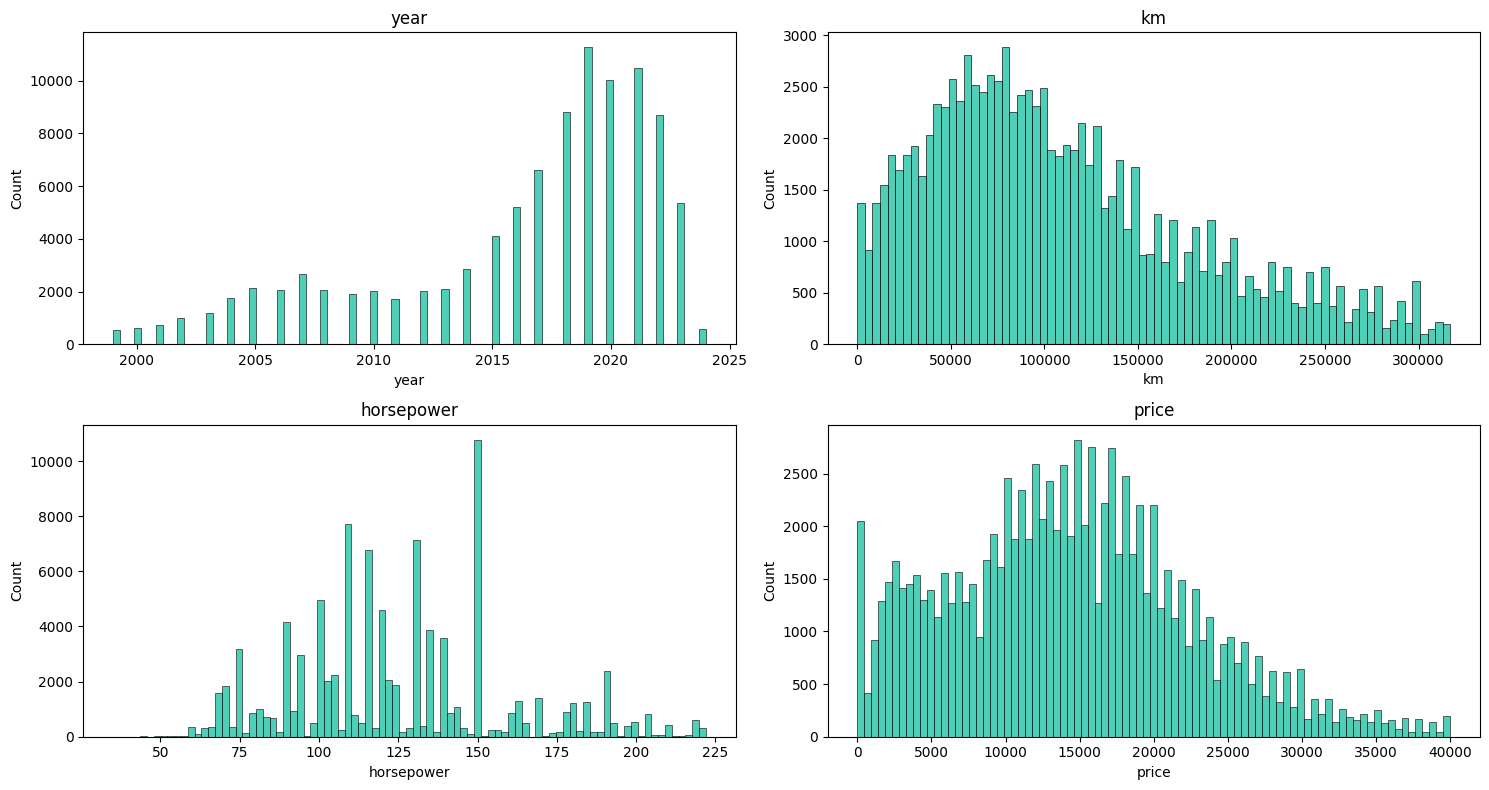

In [53]:

# Número de columnas para la cuadrícula
num_columns = 2
num_plots = len(df_sin_outliers.columns)
num_rows = (num_plots + num_columns - 1) // num_columns  # Calcular el número de filas necesarias

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

for i, column in enumerate(df_sin_outliers.columns):
    sns.histplot(df_sin_outliers[column], ax=axes[i], kde=False, color='#15BFA0')
    axes[i].set_title(column)


plt.tight_layout()
plt.show()

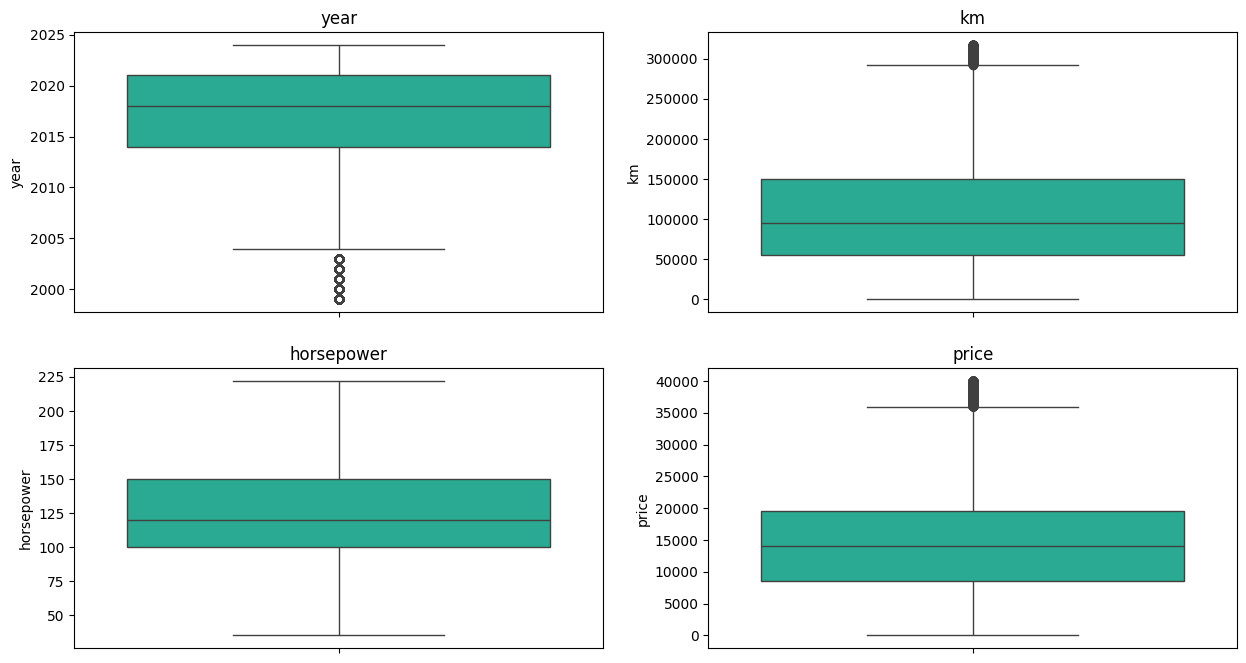

In [54]:
# Número de columnas para la cuadrícula
num_columns = 2
num_plots = len(df_sin_outliers.columns)
num_rows = (num_plots + num_columns - 1) // num_columns  # Calcular el número de filas necesarias

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

for i, column in enumerate(df_numericas.columns):
    sns.boxplot(df_sin_outliers[column], ax=axes[i], color='#15BFA0')
    axes[i].set_title(column)


sns.boxplot()
plt.show()


In [55]:
df_sin_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
year,98499.0,2016.220266,5.867200,1999.0,2014.0,2018.0,2021.0,2024.0
km,98499.0,109233.926415,71792.012139,0.0,55000.0,94549.0,150000.0,317000.0
horsepower,98499.0,125.025300,33.897338,35.0,100.0,120.0,150.0,222.0
price,98499.0,14396.754665,8120.262420,0.0,8500.0,14000.0,19490.0,40000.0


In [56]:
corr_matrix = df_sin_outliers.corr()
corr_matrix

,year,km,horsepower,price
year,1.000000,-0.698434,0.083835,0.659745
km,-0.698434,1.000000,0.020487,-0.523844
horsepower,0.083835,0.020487,1.000000,0.494728
price,0.659745,-0.523844,0.494728,1.000000


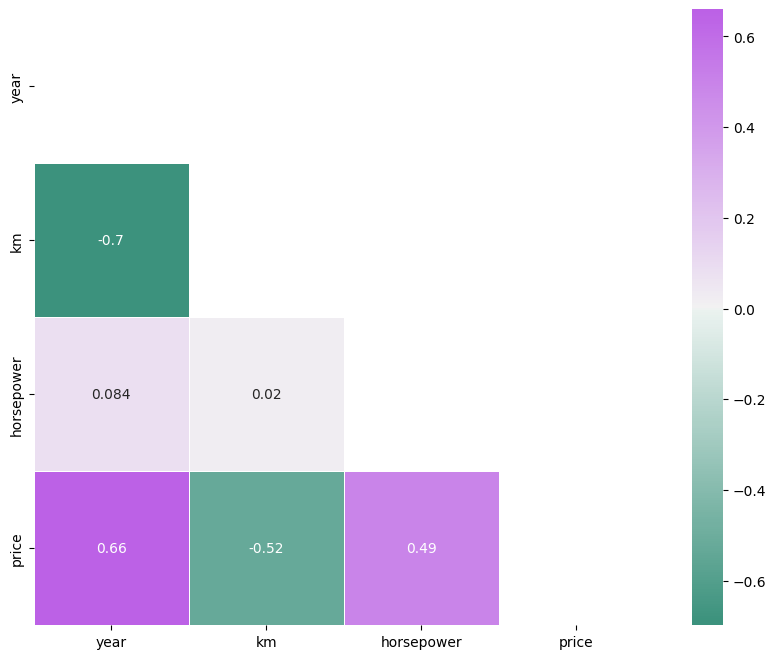

In [57]:
# Crea una máscara para la parte superior de la matriz de correlación
mask = np.zeros_like(df_sin_outliers.corr())
mask[np.triu_indices_from(mask)] = True 

# Define una paleta de colores personalizada basada en #15BFA0
cmap = sns.diverging_palette(165, 290, s=80, l=55, n=9, center="light", as_cmap=True)

# Crear el heatmap con la paleta de colores personalizada
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_sin_outliers.corr(), mask=mask, annot=True, cmap=cmap, center=0, linewidths=.5)

# Mostrar el gráfico
plt.show()


### 4.2 Valores categoricas:

In [58]:
df_categorical= df.select_dtypes(exclude = 'number')
df_categorical.head()

,content_id,title,storytelling,user_id,flag_bumped,currency,model,version,engine,gearbox,location.city,location.postal_code,location.country_code,location.province,brand
0,4z4eqpmqwvjy,Lynk & Co 01 1.5 PHEV 192 kW (261 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,True,EUR,01,1.5 PHEV 192 kW (261 CV),Eléctrico,automatic,Granada,18014,ES,Granada,lynk & co
1,qjw4qk8wpgzo,CUPRA Leon 1.5 eTSI DSG 110 kW (150 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,True,EUR,Leon,1.5 eTSI DSG 110 kW (150 CV),Gasolina,automatic,Granada,18014,ES,Granada,cupra
2,36e1el0ekqjd,Volkswagen Polo R-Line 1.0 TSI 70 kW (95 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,True,EUR,Polo,R-Line 1.0 TSI 70 kW (95 CV),Gasolina,manual,Granada,18014,ES,Granada,volkswagen
3,4z4eqpmqxwjy,Mercedes-Benz Clase CLA CLA 250 e 160 kW (218 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,True,EUR,Clase CLA,CLA 250 e 160 kW (218 CV),Eléctrico,automatic,Granada,18014,ES,Granada,mercedes-benz
4,36e1e2k4g8jd,Volkswagen Touran Advance 2.0 TDI 110 kW (150 ...,"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,True,EUR,Touran,Advance 2.0 TDI 110 kW (150 CV) DSG,Diésel,automatic,Granada,18014,ES,Granada,volkswagen


In [59]:
# Eliminar las columnas 'title' y 'storytelling' del DataFrame df_categorical
df_categorical = df_categorical.drop(columns=['title', 'storytelling'])


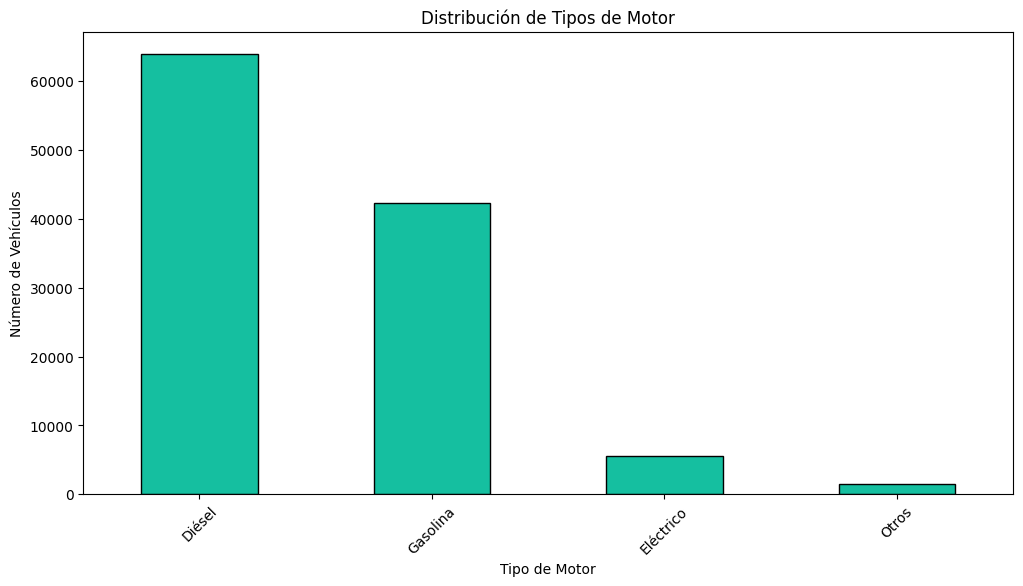

In [60]:
plt.figure(figsize=(12, 6))
df_categorical['engine'].value_counts().plot(kind='bar', color='#15BFA0', edgecolor='black')
plt.title('Distribución de Tipos de Motor')
plt.xlabel('Tipo de Motor')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=45)
plt.show()



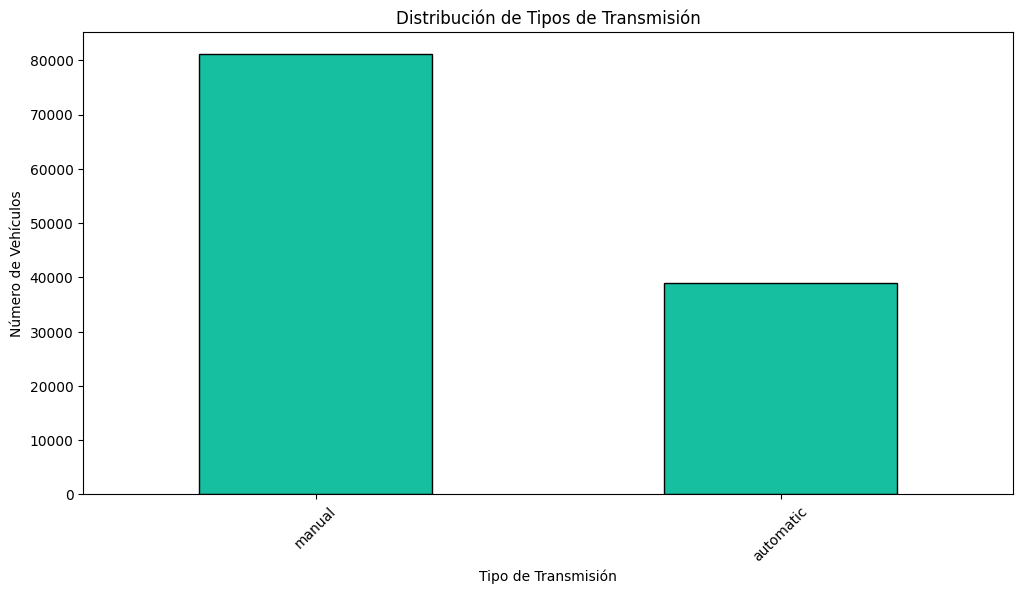

In [61]:
plt.figure(figsize=(12, 6))
df_categorical['gearbox'].value_counts().plot(kind='bar', color='#15BFA0', edgecolor='black')
plt.title('Distribución de Tipos de Transmisión')
plt.xlabel('Tipo de Transmisión')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=45)
plt.show()


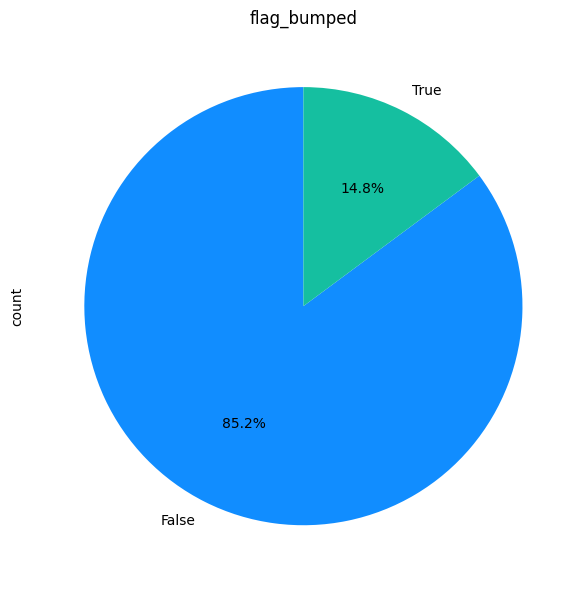

In [62]:
plt.figure(figsize=(12, 6))
flags = ['flag_bumped']
for flag in flags:
    plt.subplot(1, len(flags), flags.index(flag)+1)
    df[flag].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#118DFF','#15BFA0'], startangle=90)
    plt.title(flag)

plt.tight_layout()
plt.show()


### 4.3 Concatenar las columnas.

In [63]:
# Concatenar df_categorical y df_sin_outliers
df_concatenado = pd.concat([df_categorical, df_numericas], axis=1)
df_concatenado.head(3)

,content_id,user_id,flag_bumped,currency,model,version,engine,gearbox,location.city,location.postal_code,location.country_code,location.province,brand,year,km,horsepower,price
0,4z4eqpmqwvjy,xzo87r5ny769,True,EUR,01,1.5 PHEV 192 kW (261 CV),Eléctrico,automatic,Granada,18014,ES,Granada,lynk & co,2022.0,39973.0,261.0,25890.0
1,qjw4qk8wpgzo,xzo87r5ny769,True,EUR,Leon,1.5 eTSI DSG 110 kW (150 CV),Gasolina,automatic,Granada,18014,ES,Granada,cupra,2023.0,18900.0,150.0,24790.0
2,36e1el0ekqjd,xzo87r5ny769,True,EUR,Polo,R-Line 1.0 TSI 70 kW (95 CV),Gasolina,manual,Granada,18014,ES,Granada,volkswagen,2022.0,29994.0,95.0,18290.0


## 5. División de Gamas

### 5.1 Gama por marcas

In [64]:
# Definir las listas de marcas para cada gama
gama_lujo = ['bentley', 'porsche', 'maserati','jaguar','hummer', 'pontiac', 'cadillac','ferrari','lamborghini']

gama_premium = ['tesla','cupra', 'land rover', 'mercedes-benz', 
                   'lexus', 'lynk & co', 'volvo', 'audi', 'jeep', 
                   'bmw', 'infiniti',  'alfa romeo', 'dodge',  
                   'subaru', 'toyota', 'mazda', 'volkswagen']

gama_estandar = ['abarth','ds','swm','dfsk', 'dr','hyundai', 'mitsubishi', 'chatenet', 
                'mini', 'honda', 'nissan', 'peugeot', 'evo', 'ford', 'suzuki', 
                'seat', 'renault', 'ssangyong', 'opel', 'citroen', 'mg',]

gama_economica = ['mahindra','dacia', 'lancia', 'fiat', 'skoda','kia', 'smart', 'ligier',
                  'aixam', 'chrysler', 'chevrolet', 'saab','microcar', 'tata', 'daewoo']


In [65]:
def categorizar_gama(marca):
    if marca in gama_lujo:
        return 'Gama lujo'
    elif marca in gama_premium:
        return 'Gama premium'
    elif marca in gama_estandar:
        return 'Gama estandar'
    elif marca in gama_economica:
        return 'Gama economica'
    else:
        return 'Otra'

In [66]:
# Aplicar la función al DataFrame con outliers
df_categorical['gama_marca'] = df_categorical['brand'].apply(categorizar_gama)

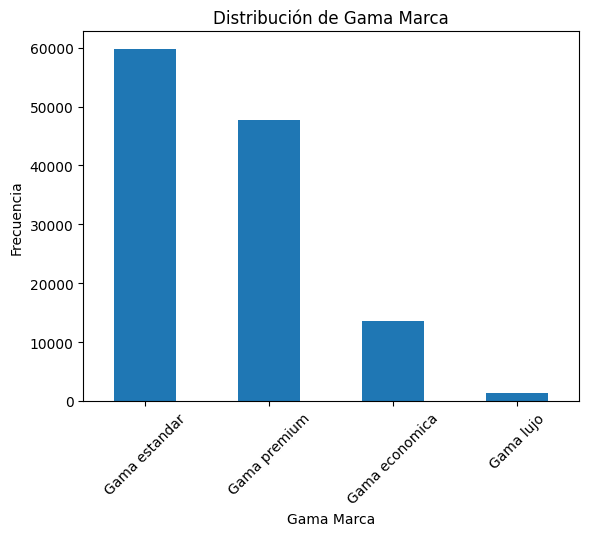

In [67]:
# Contar la frecuencia de cada categoría
gama_counts = df_categorical['gama_marca'].value_counts()

# Crear un gráfico de barras
gama_counts.plot(kind='bar')
plt.title('Distribución de Gama Marca')
plt.xlabel('Gama Marca')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rota las etiquetas para mejor legibilidad
plt.show()


### 5.2 Gama por precio

In [68]:
def categorizar_gama_precio(precio):
    if precio > 50000:
        return 'Muy caro'
    elif 30000 < precio <= 50000:
        return 'Caro'
    elif 15000 < precio <= 30000:
        return 'Medio alto'
    elif 8000 < precio <= 15000:
        return 'Medio'
    elif 3000 < precio <= 8000:
        return 'Barato'
    elif precio <= 3000:
        return 'Muy Barato'
    else:
        return 'NaN'



In [69]:
# Aplicar la función al DataFrame correcto que contiene la columna 'price'
df_categorical['gama_precio'] = df_numericas['price'].apply(categorizar_gama_precio)

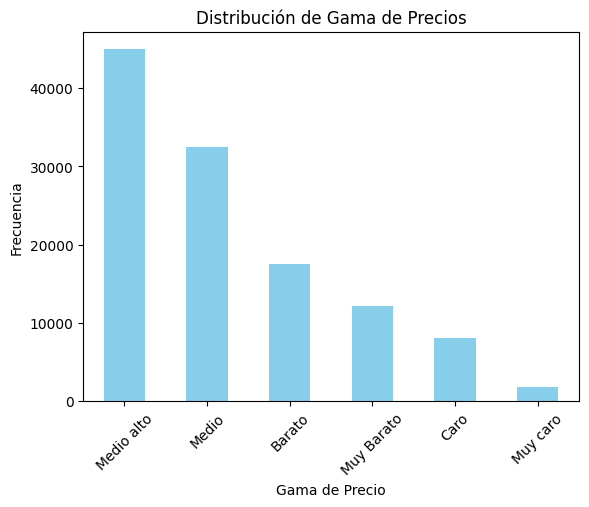

In [70]:
# Contar la frecuencia de cada categoría
precio_counts = df_categorical['gama_precio'].value_counts()

# Crear un gráfico de barras
precio_counts.plot(kind='bar', color='skyblue')  # Color personalizado
plt.title('Distribución de Gama de Precios')
plt.xlabel('Gama de Precio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rota las etiquetas para mejor legibilidad
plt.show()


### Estudio flag_bumped (destacado, renovacion automatico)

In [71]:
# Concatenar df_categorical y df_numericas
df_concatenado = pd.concat([df_categorical, df_numericas], axis=1)
df_concatenado.head(3)

,content_id,user_id,flag_bumped,currency,model,version,engine,gearbox,location.city,location.postal_code,location.country_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
0,4z4eqpmqwvjy,xzo87r5ny769,True,EUR,01,1.5 PHEV 192 kW (261 CV),Eléctrico,automatic,Granada,18014,ES,Granada,lynk & co,Gama premium,Medio alto,2022.0,39973.0,261.0,25890.0
1,qjw4qk8wpgzo,xzo87r5ny769,True,EUR,Leon,1.5 eTSI DSG 110 kW (150 CV),Gasolina,automatic,Granada,18014,ES,Granada,cupra,Gama premium,Medio alto,2023.0,18900.0,150.0,24790.0
2,36e1el0ekqjd,xzo87r5ny769,True,EUR,Polo,R-Line 1.0 TSI 70 kW (95 CV),Gasolina,manual,Granada,18014,ES,Granada,volkswagen,Gama premium,Medio alto,2022.0,29994.0,95.0,18290.0


In [72]:
df_concatenado.shape

(122436, 19)

In [73]:
df_concatenado.columns

Index(['content_id', 'user_id', 'flag_bumped', 'currency', 'model', 'version',
       'engine', 'gearbox', 'location.city', 'location.postal_code',
       'location.country_code', 'location.province', 'brand', 'gama_marca',
       'gama_precio', 'year', 'km', 'horsepower', 'price'],
      dtype='object')

In [74]:
# Guardar df_concatenado como un archivo CSV
df_concatenado.to_csv('D:/Proyecto ironhack/files/df_concatenado.csv', index=False)

## 6. Preparacióm para los modelos

### 6.1 Codificacion

Voy a eliminar y codificar las columnas que necesito. 
Para ello realizare la codificación de diferentes maneras, como son LabelEncoder, convertir las columnas booleanas a 0 y 1, 

In [75]:
# Eliminar las columnas especificadas
df_categorical_machine = df_categorical.drop(['user_id','content_id','version'], axis=1)

# Mostrar el resultado
df_categorical_machine.head(2)


,flag_bumped,currency,model,engine,gearbox,location.city,location.postal_code,location.country_code,location.province,brand,gama_marca,gama_precio
0,True,EUR,01,Eléctrico,automatic,Granada,18014,ES,Granada,lynk & co,Gama premium,Medio alto
1,True,EUR,Leon,Gasolina,automatic,Granada,18014,ES,Granada,cupra,Gama premium,Medio alto


In [76]:
# Crear el objeto LabelEncoder
le = LabelEncoder()

# Ajustar y transformar la columna 'brand'
df_categorical_machine['brand'] = le.fit_transform(df_categorical_machine['brand'])

# Ver los valores únicos después de la codificación
print(df_categorical_machine['brand'].unique())


[31  9 57 35 36  4 22  2 42 29 38 45 18 47  8 41  1 19 26 40 10 44 48 56
 50 51  3 24 39 25 34 58 23 55 15 49 30  6  0 11 12 46 52 20 37 33 16 14
 28  7 13  5 21 17 27 54 53 43 32]


In [77]:
# Aplicar Label Encoding a múltiples columnas categóricas
columns_to_encode = ['model', 'location.city', 'location.province', 'currency', 'gearbox', 'engine']

for column in columns_to_encode:
    df_categorical_machine[column] = le.fit_transform(df_categorical_machine[column])


In [78]:
df_categorical_machine

,flag_bumped,currency,model,engine,gearbox,location.city,location.postal_code,location.country_code,location.province,brand,gama_marca,gama_precio
0,True,0,15,1,0,875,18014,ES,15,31,Gama premium,Medio alto
1,True,0,1600,2,0,875,18014,ES,15,9,Gama premium,Medio alto
2,True,0,1966,2,1,875,18014,ES,15,57,Gama premium,Medio alto
3,True,0,850,1,0,875,18014,ES,15,35,Gama premium,Caro
4,True,0,2440,0,0,875,18014,ES,15,57,Gama premium,Medio alto
...,...,...,...,...,...,...,...,...,...,...,...,...
146611,False,0,1520,0,1,1850,15189,ES,21,45,Gama estandar,Muy Barato
146612,False,0,2210,0,1,1426,15680,ES,21,22,Gama estandar,NaN
146613,False,0,2000,0,0,1123,15689,ES,21,2,Gama premium,Caro
146614,False,0,2419,0,0,1123,15689,ES,21,57,Gama premium,Medio alto


In [79]:
# Convertir 'location.postal_code' a números
df_categorical_machine['location.postal_code'] = pd.to_numeric(df_categorical_machine['location.postal_code'], errors='coerce')

# Convertir 'location.country_code' a números (utilizando el codificador de etiquetas)
le = LabelEncoder()
df_categorical_machine['location.country_code'] = le.fit_transform(df_categorical_machine['location.country_code'])

# Verificar los resultados
print(df_categorical_machine[['location.postal_code', 'location.country_code']].head())


   location.postal_code  location.country_code
0                 18014                      0
1                 18014                      0
2                 18014                      0
3                 18014                      0
4                 18014                      0


In [80]:
# Convertir las columnas booleanas a 0 y 1
boolean_columns = ['flag_bumped']

df_categorical_machine[boolean_columns] = df_categorical_machine[boolean_columns].astype(int)


In [81]:
# Inicializamos LabelEncoder y aplicamos la transformación
le1 = LabelEncoder()
df_categorical_machine['gama_marca'] = le1.fit_transform(df_categorical_machine['gama_marca'])

In [82]:
# Inicializamos LabelEncoder y aplicamos la transformación
le2 = LabelEncoder()
df_categorical_machine['gama_precio'] = le2.fit_transform(df_categorical_machine['gama_precio'])

In [83]:
df_categorical_machine.head(2)

,flag_bumped,currency,model,engine,gearbox,location.city,location.postal_code,location.country_code,location.province,brand,gama_marca,gama_precio
0,1,0,15,1,0,875,18014,0,15,31,3,3
1,1,0,1600,2,0,875,18014,0,15,9,3,3


### 6.2 Modelos

In [84]:
df_machine_learning = pd.concat([df_categorical_machine, df_numericas], axis=1)
df_machine_learning.head(2)

,flag_bumped,currency,model,engine,gearbox,location.city,location.postal_code,location.country_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
0,1,0,15,1,0,875,18014,0,15,31,3,3,2022.0,39973.0,261.0,25890.0
1,1,0,1600,2,0,875,18014,0,15,9,3,3,2023.0,18900.0,150.0,24790.0


In [85]:
df_machine_learning_sin_outliers = pd.concat([df_categorical_machine, df_sin_outliers], axis=1)
df_machine_learning.head(2)

,flag_bumped,currency,model,engine,gearbox,location.city,location.postal_code,location.country_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
0,1,0,15,1,0,875,18014,0,15,31,3,3,2022.0,39973.0,261.0,25890.0
1,1,0,1600,2,0,875,18014,0,15,9,3,3,2023.0,18900.0,150.0,24790.0


In [86]:
df_machine_learning = df_machine_learning.dropna()

In [87]:
df_machine_learning_sin_outliers = df_machine_learning_sin_outliers.dropna()

In [88]:
df_machine_learning.columns

Index(['flag_bumped', 'currency', 'model', 'engine', 'gearbox',
       'location.city', 'location.postal_code', 'location.country_code',
       'location.province', 'brand', 'gama_marca', 'gama_precio', 'year', 'km',
       'horsepower', 'price'],
      dtype='object')

In [89]:
# Corrección del código para eliminar múltiples columnas
df_machine_learning_sin_outliers = df_machine_learning_sin_outliers.drop(columns=['location.country_code', 'currency'])

### 6.3 Grupo gama marca

In [90]:
# Creamos un mapeo de las etiquetas originales a las etiquetas numéricas
label_mapping = dict(zip(le1.classes_, le1.transform(le1.classes_)))

# Imprimir el mapeo
label_mapping

{'Gama economica': 0, 'Gama estandar': 1, 'Gama lujo': 2, 'Gama premium': 3}

In [91]:
df_gama_economico = df_machine_learning_sin_outliers[df_machine_learning_sin_outliers['gama_marca'] == 0]
print("Gama economico:")
df_gama_economico.head(2)

Gama economico:


,flag_bumped,model,engine,gearbox,location.city,location.postal_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
41,1,297,2,1,875,18014,15,18,0,2,2021.0,65618.0,70.0,11690.0
68,1,287,2,1,875,18014,15,18,0,2,2021.0,58514.0,70.0,10580.0


In [92]:
df_gama_estandar = df_machine_learning_sin_outliers[df_machine_learning_sin_outliers['gama_marca'] == 1]
print("\nGama estandar:")
df_gama_estandar.head(2)


Gama estandar:


,flag_bumped,model,engine,gearbox,location.city,location.postal_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
6,1,1402,2,1,875,18014,15,36,1,3,2023.0,14250.0,162.0,19890.0
8,1,2495,2,1,875,18014,15,22,1,3,2024.0,25500.0,150.0,29890.0


In [93]:
df_gama_lujo = df_machine_learning_sin_outliers[df_machine_learning_sin_outliers['gama_marca'] == 2]
print("\nGama lujo:")
df_gama_lujo.head(2)


Gama lujo:


,flag_bumped,model,engine,gearbox,location.city,location.postal_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
212,1,1063,0,1,627,18195,15,24,2,3,2019.0,179200.0,150.0,20850.0
217,1,1154,0,0,627,18195,15,24,2,3,2019.0,76600.0,180.0,25950.0


In [94]:
df_gama_premium = df_machine_learning_sin_outliers[df_machine_learning_sin_outliers['gama_marca'] == 3]
print("\nGama premium:")
df_gama_premium.head(2)


Gama premium:


,flag_bumped,model,engine,gearbox,location.city,location.postal_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
1,1,1600,2,0,875,18014,15,9,3,3,2023.0,18900.0,150.0,24790.0
2,1,1966,2,1,875,18014,15,57,3,3,2022.0,29994.0,95.0,18290.0


### 6.4 Grupo gama precio

In [95]:
# Creamos un mapeo de las etiquetas originales a las etiquetas numéricas
label_mapping = dict(zip(le2.classes_, le2.transform(le2.classes_)))

# Imprimir el mapeo
label_mapping

{'Barato': 0,
 'Caro': 1,
 'Medio': 2,
 'Medio alto': 3,
 'Muy Barato': 4,
 'Muy caro': 5,
 nan: 6}

In [96]:
# Filtrar para 'Caro'
df_caro = df_machine_learning_sin_outliers[df_machine_learning_sin_outliers['gama_precio'] == 1]
print("Caro:")
df_caro.head(2)

Caro:


,flag_bumped,model,engine,gearbox,location.city,location.postal_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
3,1,850,1,0,875,18014,15,35,3,1,2021.0,93279.0,218.0,33890.0
15,1,2011,0,0,875,18014,15,2,3,1,2020.0,99903.0,204.0,36890.0


In [97]:
# Filtrar para 'Medio alto'
df_medio_alto = df_machine_learning_sin_outliers[df_machine_learning_sin_outliers['gama_precio'] == 3]
print("Medio alto:")
df_medio_alto.head(2)

Medio alto:


,flag_bumped,model,engine,gearbox,location.city,location.postal_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
1,1,1600,2,0,875,18014,15,9,3,3,2023.0,18900.0,150.0,24790.0
2,1,1966,2,1,875,18014,15,57,3,3,2022.0,29994.0,95.0,18290.0


In [98]:

# Filtrar para 'Medio'
df_medio = df_machine_learning_sin_outliers[df_machine_learning_sin_outliers['gama_precio'] == 2]
print("Medio:")
df_medio.head(2)

Medio:


,flag_bumped,model,engine,gearbox,location.city,location.postal_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
28,1,1966,2,1,875,18014,15,57,3,2,2018.0,98300.0,75.0,10890.0
36,1,774,2,1,875,18014,15,45,1,2,2019.0,76079.0,90.0,11890.0


In [99]:
# Filtrar para 'Barato'
df_barato = df_machine_learning_sin_outliers[df_machine_learning_sin_outliers['gama_precio'] == 0]
print("Barato:")
df_barato.head(2)


Barato:


,flag_bumped,model,engine,gearbox,location.city,location.postal_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
54,1,946,2,0,875,18014,15,41,1,0,2015.0,114899.0,90.0,7890.0
177,1,1600,2,1,185,18100,15,47,1,0,2004.0,222000.0,105.0,3500.0


In [100]:
# Filtrar para 'Muy barato'
df_muy_barato = df_machine_learning_sin_outliers[df_machine_learning_sin_outliers['gama_precio'] == 4]
print("Muy barato:")
df_muy_barato.head(2)

Muy barato:


,flag_bumped,model,engine,gearbox,location.city,location.postal_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
366,1,1433,0,1,523,18190,15,47,1,4,2003.0,256000.0,100.0,2650.0
370,1,1926,2,1,875,18001,15,18,0,4,2011.0,150000.0,69.0,2990.0


In [101]:
# Filtrar para 'Muy caro'
df_muy_caro = df_machine_learning[df_machine_learning['gama_precio'] == 5]
# print("Muy caro:")
df_muy_caro.head(2)

,flag_bumped,currency,model,engine,gearbox,location.city,location.postal_code,location.country_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
76,1,0,1631,2,0,875,18014,0,15,4,3,5,2023.0,24500.0,510.0,97890.0
164,1,0,2407,1,0,875,18014,0,15,44,2,5,2021.0,34600.0,408.0,65890.0


In [102]:
df_machine_learning_sin_outliers

,flag_bumped,model,engine,gearbox,location.city,location.postal_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
1,1,1600,2,0,875,18014,15,9,3,3,2023.0,18900.0,150.0,24790.0
2,1,1966,2,1,875,18014,15,57,3,3,2022.0,29994.0,95.0,18290.0
3,1,850,1,0,875,18014,15,35,3,1,2021.0,93279.0,218.0,33890.0
4,1,2440,0,0,875,18014,15,57,3,3,2021.0,79934.0,150.0,24890.0
6,1,1402,2,1,875,18014,15,36,1,3,2023.0,14250.0,162.0,19890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146607,0,839,0,1,1123,15689,21,35,3,3,2018.0,129000.0,136.0,19900.0
146608,0,178,0,1,1123,15689,21,34,3,2,2017.0,155000.0,150.0,13900.0
146610,0,1350,0,0,452,15175,21,8,1,0,2007.0,292000.0,110.0,3950.0
146613,0,2000,0,0,1123,15689,21,2,3,1,2019.0,129000.0,190.0,33900.0


## 7 Prueba de Hipótesis con t-Student

- Hipótesis nula (H₀): No existe una diferencia significativa en los precios entre los coches con flag_bumped y los que no lo tienen; cualquier diferencia observada es atribuible al azar.

- Hipótesis alternativa (H₁): Existe una diferencia significativa en los precios entre los coches con flag_bumped y los que no lo tienen; esta diferencia no es aleatoria.

Se tomará una muestra de precios de coches con y sin flag_bumped, se calculará la media de precios en ambos grupos y se utilizará la prueba t-Student para comparar las medias. Este análisis permitirá determinar si la visibilidad adicional proporcionada por flag_bumped está relacionada con un cambio en el precio de venta.

Precio medio de coches con flag_bumped: 19118.730882623706
Precio medio de coches sin flag_bumped: 15434.886401835876
Precio mediano de coches con flag_bumped: 16757.21
Precio mediano de coches sin flag_bumped: 13990.0


C:\Users\marco\AppData\Local\Temp\ipykernel_20036\3947135323.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gama_economico, x='flag_bumped', y='price', palette='Set2')


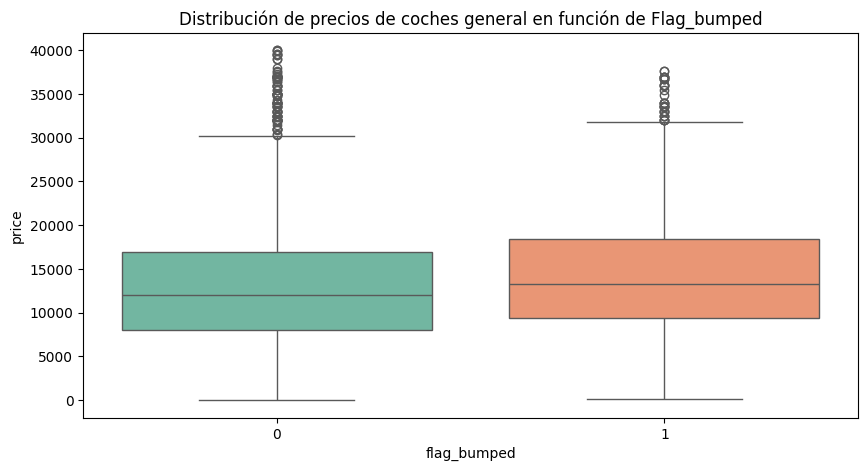

Test t para igualdad de medias: estadístico = 33.45420344152363, p-valor = 1.1045403720808055e-239


In [103]:
# Separar en dos grupos según la bandera 'flag_bumped'
df_bumped = df_machine_learning[df_machine_learning['flag_bumped'] == True]
df_non_bumped = df_machine_learning[df_machine_learning['flag_bumped'] == False]

# Comparar precios medios y medianos
mean_bumped = df_bumped['price'].mean()
mean_non_bumped = df_non_bumped['price'].mean()
median_bumped = df_bumped['price'].median()
median_non_bumped = df_non_bumped['price'].median()

print(f"Precio medio de coches con flag_bumped: {mean_bumped}")
print(f"Precio medio de coches sin flag_bumped: {mean_non_bumped}")
print(f"Precio mediano de coches con flag_bumped: {median_bumped}")
print(f"Precio mediano de coches sin flag_bumped: {median_non_bumped}")

# Visualizar distribuciones de precios
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_gama_economico, x='flag_bumped', y='price', palette='Set2')
plt.title('Distribución de precios de coches general en función de Flag_bumped')
plt.show()

# Realizar test estadístico para comparar las medias
stat, p_value = ttest_ind(df_bumped['price'], df_non_bumped['price'], equal_var=False)
print(f"Test t para igualdad de medias: estadístico = {stat}, p-valor = {p_value}")

### 7.1 Prueba de Hipótesis por gama marcas

Precio medio de coches con flag_bumped: 14311.605021770682
Precio medio de coches sin flag_bumped: 12263.877193419741
Precio mediano de coches con flag_bumped: 13290.0
Precio mediano de coches sin flag_bumped: 11990.0


C:\Users\marco\AppData\Local\Temp\ipykernel_20036\3817858631.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gama_economico, x='flag_bumped', y='price', palette='Set2')


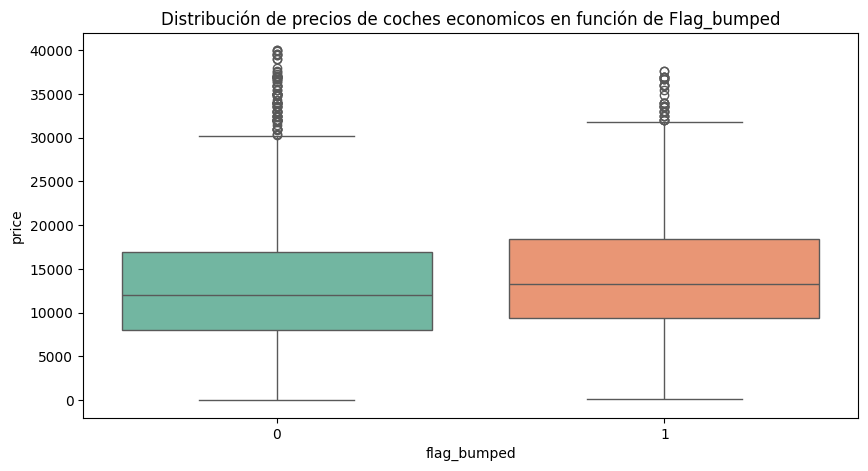

Test t para igualdad de medias: estadístico = 12.623033170085217, p-valor = 1.326095765736106e-35


In [104]:
# Separar en dos grupos según la bandera 'flag_bumped'
df_bumped = df_gama_economico[df_gama_economico['flag_bumped'] == True]
df_non_bumped = df_gama_economico[df_gama_economico['flag_bumped'] == False]

# Comparar precios medios y medianos
mean_bumped = df_bumped['price'].mean()
mean_non_bumped = df_non_bumped['price'].mean()
median_bumped = df_bumped['price'].median()
median_non_bumped = df_non_bumped['price'].median()

print(f"Precio medio de coches con flag_bumped: {mean_bumped}")
print(f"Precio medio de coches sin flag_bumped: {mean_non_bumped}")
print(f"Precio mediano de coches con flag_bumped: {median_bumped}")
print(f"Precio mediano de coches sin flag_bumped: {median_non_bumped}")

# Visualizar distribuciones de precios
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_gama_economico, x='flag_bumped', y='price', palette='Set2')
plt.title('Distribución de precios de coches economicos en función de Flag_bumped')
plt.show()

# Realizar test estadístico para comparar las medias
stat, p_value = ttest_ind(df_bumped['price'], df_non_bumped['price'], equal_var=False)
print(f"Test t para igualdad de medias: estadístico = {stat}, p-valor = {p_value}")


Precio medio de coches con flag_bumped: 14419.769352226722
Precio medio de coches sin flag_bumped: 12230.041408088731
Precio mediano de coches con flag_bumped: 13990.0
Precio mediano de coches sin flag_bumped: 12227.0


C:\Users\marco\AppData\Local\Temp\ipykernel_20036\3714934985.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gama_estandar, x='flag_bumped', y='price', palette='Set2')


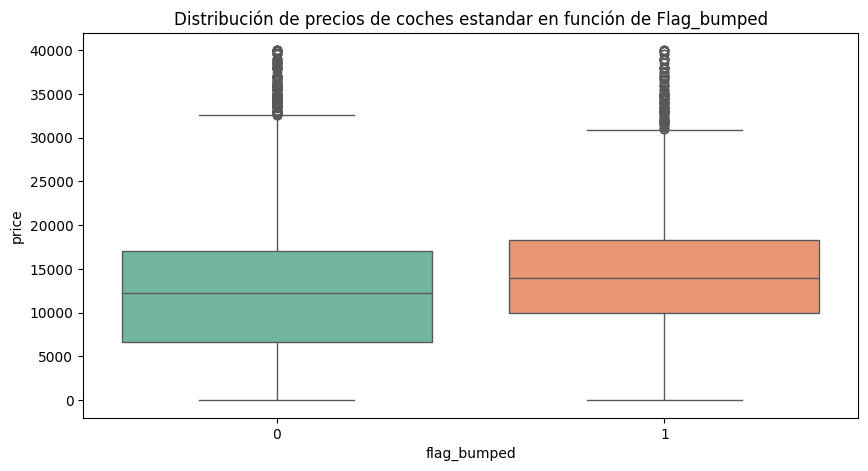

Test t para igualdad de medias: estadístico = 25.619121819286974, p-valor = 2.1692610901658103e-140


In [105]:
# Separar en dos grupos según la bandera 'flag_bumped'
df_bumped = df_gama_estandar[df_gama_estandar['flag_bumped'] == True]
df_non_bumped = df_gama_estandar[df_gama_estandar['flag_bumped'] == False]

# Comparar precios medios y medianos
mean_bumped = df_bumped['price'].mean()
mean_non_bumped = df_non_bumped['price'].mean()
median_bumped = df_bumped['price'].median()
median_non_bumped = df_non_bumped['price'].median()

print(f"Precio medio de coches con flag_bumped: {mean_bumped}")
print(f"Precio medio de coches sin flag_bumped: {mean_non_bumped}")
print(f"Precio mediano de coches con flag_bumped: {median_bumped}")
print(f"Precio mediano de coches sin flag_bumped: {median_non_bumped}")

# Visualizar distribuciones de precios
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_gama_estandar, x='flag_bumped', y='price', palette='Set2')
plt.title('Distribución de precios de coches estandar en función de Flag_bumped')
plt.show()

# Realizar test estadístico para comparar las medias
stat, p_value = ttest_ind(df_bumped['price'], df_non_bumped['price'], equal_var=False)
print(f"Test t para igualdad de medias: estadístico = {stat}, p-valor = {p_value}")

Precio medio de coches con flag_bumped: 19752.439418535425
Precio medio de coches sin flag_bumped: 17441.852602379164
Precio mediano de coches con flag_bumped: 19590.0
Precio mediano de coches sin flag_bumped: 17800.0


C:\Users\marco\AppData\Local\Temp\ipykernel_20036\3031417218.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gama_premium, x='flag_bumped', y='price', palette='Set2')


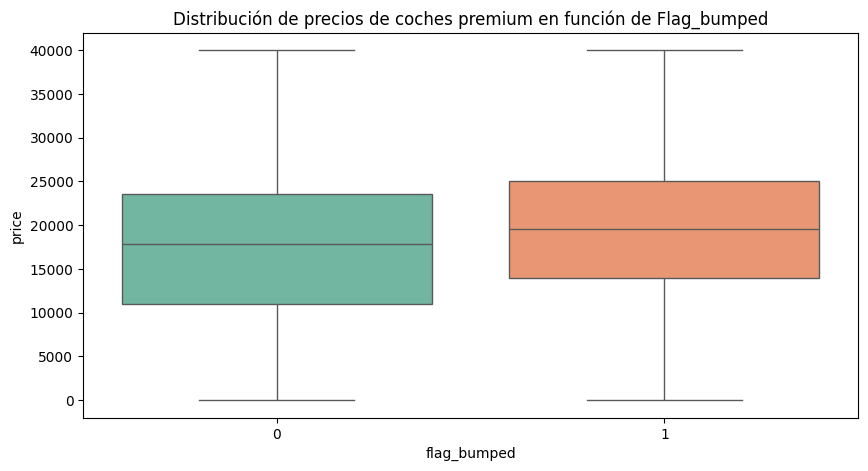

Test t para igualdad de medias: estadístico = 17.76030311521226, p-valor = 4.320845947766999e-69


In [106]:
# Separar en dos grupos según la bandera 'flag_bumped'
df_bumped = df_gama_premium[df_gama_premium['flag_bumped'] == True]
df_non_bumped = df_gama_premium[df_gama_premium['flag_bumped'] == False]

# Comparar precios medios y medianos
mean_bumped = df_bumped['price'].mean()
mean_non_bumped = df_non_bumped['price'].mean()
median_bumped = df_bumped['price'].median()
median_non_bumped = df_non_bumped['price'].median()

print(f"Precio medio de coches con flag_bumped: {mean_bumped}")
print(f"Precio medio de coches sin flag_bumped: {mean_non_bumped}")
print(f"Precio mediano de coches con flag_bumped: {median_bumped}")
print(f"Precio mediano de coches sin flag_bumped: {median_non_bumped}")

# Visualizar distribuciones de precios
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_gama_premium, x='flag_bumped', y='price', palette='Set2')
plt.title('Distribución de precios de coches premium en función de Flag_bumped')
plt.show()

# Realizar test estadístico para comparar las medias
stat, p_value = ttest_ind(df_bumped['price'], df_non_bumped['price'], equal_var=False)
print(f"Test t para igualdad de medias: estadístico = {stat}, p-valor = {p_value}")

Precio medio de coches con flag_bumped: 20796.043478260868
Precio medio de coches sin flag_bumped: 18070.10661764706
Precio mediano de coches con flag_bumped: 20500.0
Precio mediano de coches sin flag_bumped: 18642.5


C:\Users\marco\AppData\Local\Temp\ipykernel_20036\2659458648.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gama_lujo, x='flag_bumped', y='price', palette='Set2')


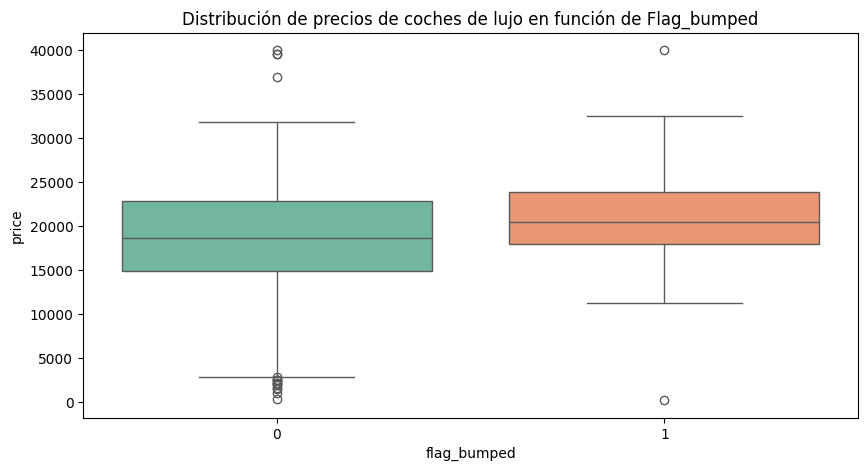

Test t para igualdad de medias: estadístico = 3.2495779084548593, p-valor = 0.0014625869528641234


In [107]:
# Separar en dos grupos según la bandera 'flag_bumped'
df_bumped = df_gama_lujo[df_gama_lujo['flag_bumped'] == True]
df_non_bumped = df_gama_lujo[df_gama_lujo['flag_bumped'] == False]

# Comparar precios medios y medianos
mean_bumped = df_bumped['price'].mean()
mean_non_bumped = df_non_bumped['price'].mean()
median_bumped = df_bumped['price'].median()
median_non_bumped = df_non_bumped['price'].median()

print(f"Precio medio de coches con flag_bumped: {mean_bumped}")
print(f"Precio medio de coches sin flag_bumped: {mean_non_bumped}")
print(f"Precio mediano de coches con flag_bumped: {median_bumped}")
print(f"Precio mediano de coches sin flag_bumped: {median_non_bumped}")

# Visualizar distribuciones de precios
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_gama_lujo, x='flag_bumped', y='price', palette='Set2')
plt.title('Distribución de precios de coches de lujo en función de Flag_bumped')
plt.show()

# Realizar test estadístico para comparar las medias
stat, p_value = ttest_ind(df_bumped['price'], df_non_bumped['price'], equal_var=False)
print(f"Test t para igualdad de medias: estadístico = {stat}, p-valor = {p_value}")

### 7.2 Prueba de Hipótesis por gama precio

Precio medio de coches con flag_bumped: 1417.8279951100244
Precio medio de coches sin flag_bumped: 1638.8343103038937
Precio mediano de coches con flag_bumped: 1500.0
Precio mediano de coches sin flag_bumped: 1800.0


C:\Users\marco\AppData\Local\Temp\ipykernel_20036\661819510.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_muy_barato, x='flag_bumped', y='price', palette='Set2')


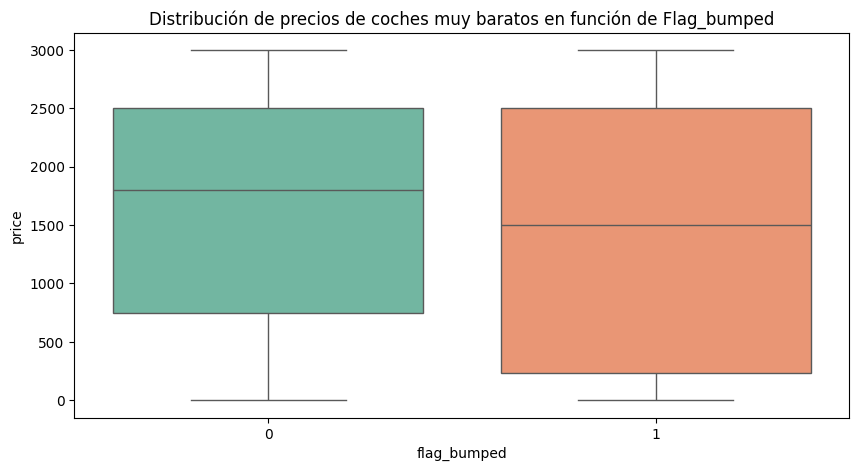

Test t para igualdad de medias: estadístico = -3.8669449220063967, p-valor = 0.00012697295430101353


In [108]:
# Separar en dos grupos según la bandera 'flag_bumped'
df_bumped = df_muy_barato[df_muy_barato['flag_bumped'] == True]
df_non_bumped = df_muy_barato[df_muy_barato['flag_bumped'] == False]

# Comparar precios medios y medianos
mean_bumped = df_bumped['price'].mean()
mean_non_bumped = df_non_bumped['price'].mean()
median_bumped = df_bumped['price'].median()
median_non_bumped = df_non_bumped['price'].median()

print(f"Precio medio de coches con flag_bumped: {mean_bumped}")
print(f"Precio medio de coches sin flag_bumped: {mean_non_bumped}")
print(f"Precio mediano de coches con flag_bumped: {median_bumped}")
print(f"Precio mediano de coches sin flag_bumped: {median_non_bumped}")

# Visualizar distribuciones de precios
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_muy_barato, x='flag_bumped', y='price', palette='Set2')
plt.title('Distribución de precios de coches muy baratos en función de Flag_bumped')
plt.show()

# Realizar test estadístico para comparar las medias
stat, p_value = ttest_ind(df_bumped['price'], df_non_bumped['price'], equal_var=False)
print(f"Test t para igualdad de medias: estadístico = {stat}, p-valor = {p_value}")

Precio medio de coches con flag_bumped: 6136.067937836223
Precio medio de coches sin flag_bumped: 5603.632837202128
Precio mediano de coches con flag_bumped: 6390.0
Precio mediano de coches sin flag_bumped: 5500.0


C:\Users\marco\AppData\Local\Temp\ipykernel_20036\2876210345.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_barato, x='flag_bumped', y='price', palette='Set2')


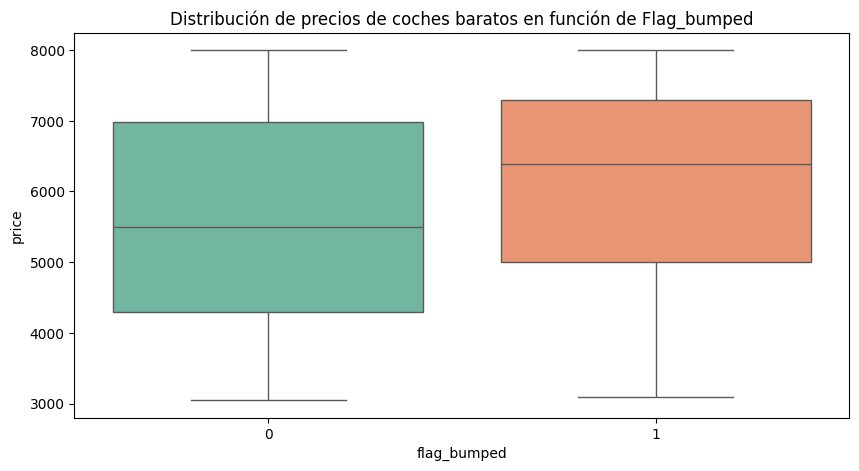

Test t para igualdad de medias: estadístico = 14.798481606657566, p-valor = 2.541787763603148e-47


In [109]:
# Separar en dos grupos según la bandera 'flag_bumped'
df_bumped = df_barato[df_barato['flag_bumped'] == True]
df_non_bumped = df_barato[df_barato['flag_bumped'] == False]

# Comparar precios medios y medianos
mean_bumped = df_bumped['price'].mean()
mean_non_bumped = df_non_bumped['price'].mean()
median_bumped = df_bumped['price'].median()
median_non_bumped = df_non_bumped['price'].median()

print(f"Precio medio de coches con flag_bumped: {mean_bumped}")
print(f"Precio medio de coches sin flag_bumped: {mean_non_bumped}")
print(f"Precio mediano de coches con flag_bumped: {median_bumped}")
print(f"Precio mediano de coches sin flag_bumped: {median_non_bumped}")

# Visualizar distribuciones de precios
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_barato, x='flag_bumped', y='price', palette='Set2')
plt.title('Distribución de precios de coches baratos en función de Flag_bumped')
plt.show()

# Realizar test estadístico para comparar las medias
stat, p_value = ttest_ind(df_bumped['price'], df_non_bumped['price'], equal_var=False)
print(f"Test t para igualdad de medias: estadístico = {stat}, p-valor = {p_value}")


Precio medio de coches con flag_bumped: 11869.212372329604
Precio medio de coches sin flag_bumped: 11850.449903764396
Precio mediano de coches con flag_bumped: 11990.0
Precio mediano de coches sin flag_bumped: 11955.0


C:\Users\marco\AppData\Local\Temp\ipykernel_20036\3886158736.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_medio, x='flag_bumped', y='price', palette='Set2')


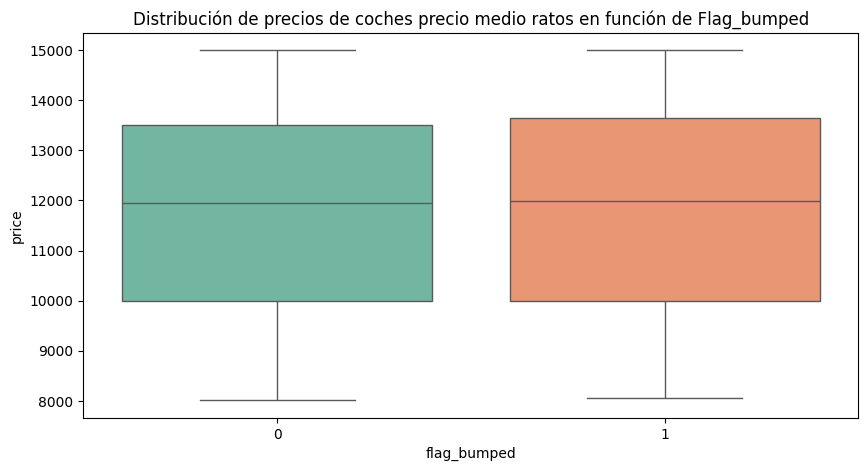

Test t para igualdad de medias: estadístico = 0.6004360549569345, p-valor = 0.5482355672170613


In [110]:
# Separar en dos grupos según la bandera 'flag_bumped'
df_bumped = df_medio[df_medio['flag_bumped'] == True]
df_non_bumped = df_medio[df_medio['flag_bumped'] == False]

# Comparar precios medios y medianos
mean_bumped = df_bumped['price'].mean()
mean_non_bumped = df_non_bumped['price'].mean()
median_bumped = df_bumped['price'].median()
median_non_bumped = df_non_bumped['price'].median()

print(f"Precio medio de coches con flag_bumped: {mean_bumped}")
print(f"Precio medio de coches sin flag_bumped: {mean_non_bumped}")
print(f"Precio mediano de coches con flag_bumped: {median_bumped}")
print(f"Precio mediano de coches sin flag_bumped: {median_non_bumped}")

# Visualizar distribuciones de precios
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_medio, x='flag_bumped', y='price', palette='Set2')
plt.title('Distribución de precios de coches precio medio ratos en función de Flag_bumped')
plt.show()

# Realizar test estadístico para comparar las medias
stat, p_value = ttest_ind(df_bumped['price'], df_non_bumped['price'], equal_var=False)
print(f"Test t para igualdad de medias: estadístico = {stat}, p-valor = {p_value}")

Precio medio de coches con flag_bumped: 20763.697275796272
Precio medio de coches sin flag_bumped: 20410.081726793436
Precio mediano de coches con flag_bumped: 19990.0
Precio mediano de coches sin flag_bumped: 19500.0


C:\Users\marco\AppData\Local\Temp\ipykernel_20036\1422347734.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_medio_alto, x='flag_bumped', y='price', palette='Set2')


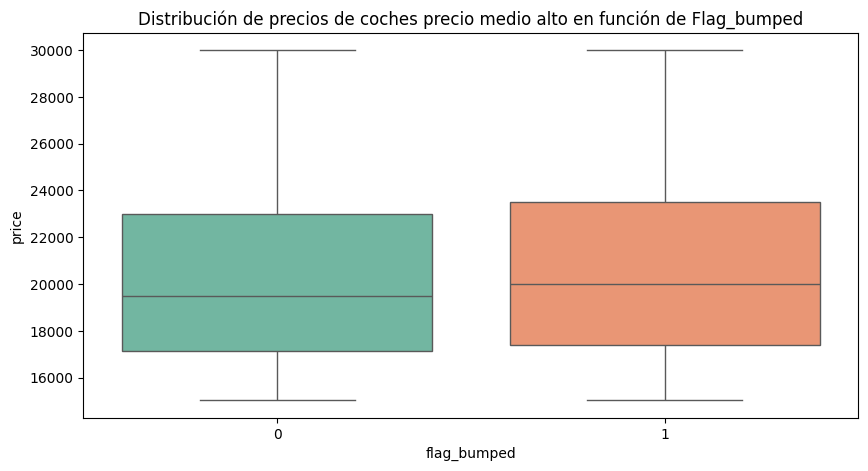

Test t para igualdad de medias: estadístico = 6.7082140816969265, p-valor = 2.0815457808527864e-11


In [111]:
# Separar en dos grupos según la bandera 'flag_bumped'
df_bumped = df_medio_alto[df_medio_alto['flag_bumped'] == True]
df_non_bumped = df_medio_alto[df_medio_alto['flag_bumped'] == False]

# Comparar precios medios y medianos
mean_bumped = df_bumped['price'].mean()
mean_non_bumped = df_non_bumped['price'].mean()
median_bumped = df_bumped['price'].median()
median_non_bumped = df_non_bumped['price'].median()

print(f"Precio medio de coches con flag_bumped: {mean_bumped}")
print(f"Precio medio de coches sin flag_bumped: {mean_non_bumped}")
print(f"Precio mediano de coches con flag_bumped: {median_bumped}")
print(f"Precio mediano de coches sin flag_bumped: {median_non_bumped}")

# Visualizar distribuciones de precios
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_medio_alto, x='flag_bumped', y='price', palette='Set2')
plt.title('Distribución de precios de coches precio medio alto en función de Flag_bumped')
plt.show()

# Realizar test estadístico para comparar las medias
stat, p_value = ttest_ind(df_bumped['price'], df_non_bumped['price'], equal_var=False)
print(f"Test t para igualdad de medias: estadístico = {stat}, p-valor = {p_value}")

Precio medio de coches con flag_bumped: 34521.63361290322
Precio medio de coches sin flag_bumped: 34116.49558711465
Precio mediano de coches con flag_bumped: 33990.0
Precio mediano de coches sin flag_bumped: 33500.0


C:\Users\marco\AppData\Local\Temp\ipykernel_20036\2025839547.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_caro, x='flag_bumped', y='price', palette='Set2')


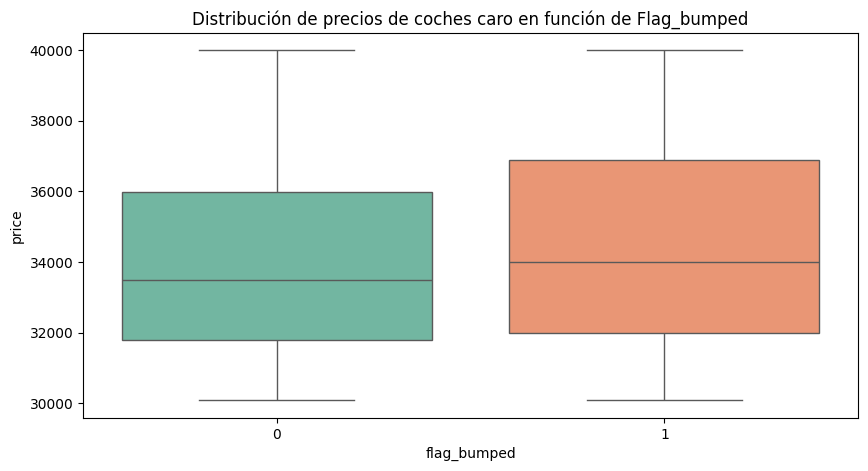

Test t para igualdad de medias: estadístico = 3.5283179313270576, p-valor = 0.0004339972472183728


In [112]:
# Separar en dos grupos según la bandera 'flag_bumped'
df_bumped = df_caro[df_caro['flag_bumped'] == True]
df_non_bumped = df_caro[df_caro['flag_bumped'] == False]

# Comparar precios medios y medianos
mean_bumped = df_bumped['price'].mean()
mean_non_bumped = df_non_bumped['price'].mean()
median_bumped = df_bumped['price'].median()
median_non_bumped = df_non_bumped['price'].median()

print(f"Precio medio de coches con flag_bumped: {mean_bumped}")
print(f"Precio medio de coches sin flag_bumped: {mean_non_bumped}")
print(f"Precio mediano de coches con flag_bumped: {median_bumped}")
print(f"Precio mediano de coches sin flag_bumped: {median_non_bumped}")

# Visualizar distribuciones de precios
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_caro, x='flag_bumped', y='price', palette='Set2')
plt.title('Distribución de precios de coches caro en función de Flag_bumped')
plt.show()

# Realizar test estadístico para comparar las medias
stat, p_value = ttest_ind(df_bumped['price'], df_non_bumped['price'], equal_var=False)
print(f"Test t para igualdad de medias: estadístico = {stat}, p-valor = {p_value}")

Precio medio de coches con flag_bumped: 73949.60888888889
Precio medio de coches sin flag_bumped: 75382.81995661605
Precio mediano de coches con flag_bumped: 65103.0
Precio mediano de coches sin flag_bumped: 62900.0


C:\Users\marco\AppData\Local\Temp\ipykernel_20036\4177081243.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_muy_caro, x='flag_bumped', y='price', palette='Set2')


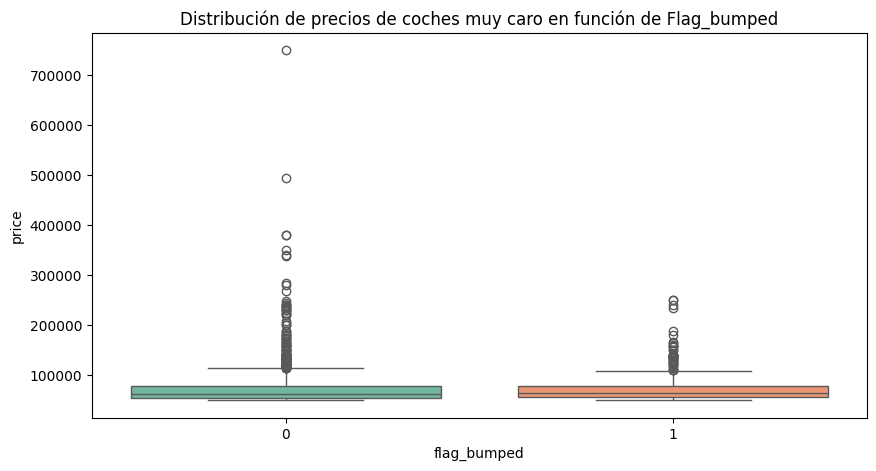

Test t para igualdad de medias: estadístico = -0.7856288334958581, p-valor = 0.4322782565668227


In [113]:
# Separar en dos grupos según la bandera 'flag_bumped'
df_bumped = df_muy_caro[df_muy_caro['flag_bumped'] == True]
df_non_bumped = df_muy_caro[df_muy_caro['flag_bumped'] == False]

# Comparar precios medios y medianos
mean_bumped = df_bumped['price'].mean()
mean_non_bumped = df_non_bumped['price'].mean()
median_bumped = df_bumped['price'].median()
median_non_bumped = df_non_bumped['price'].median()

print(f"Precio medio de coches con flag_bumped: {mean_bumped}")
print(f"Precio medio de coches sin flag_bumped: {mean_non_bumped}")
print(f"Precio mediano de coches con flag_bumped: {median_bumped}")
print(f"Precio mediano de coches sin flag_bumped: {median_non_bumped}")

# Visualizar distribuciones de precios
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_muy_caro, x='flag_bumped', y='price', palette='Set2')
plt.title('Distribución de precios de coches muy caro en función de Flag_bumped')
plt.show()

# Realizar test estadístico para comparar las medias
stat, p_value = ttest_ind(df_bumped['price'], df_non_bumped['price'], equal_var=False)
print(f"Test t para igualdad de medias: estadístico = {stat}, p-valor = {p_value}")

## 8. Porcentaje de flag bumped(anuncios destacados).

### 8.1 Porcentaje de anuncios destacado por gama marcas

In [114]:
# Creamos un mapeo de las etiquetas originales a las etiquetas numéricas
label_mapping = dict(zip(le1.classes_, le1.transform(le1.classes_)))

# Imprimir el mapeo
label_mapping

{'Gama economica': 0, 'Gama estandar': 1, 'Gama lujo': 2, 'Gama premium': 3}

In [115]:
# Calcular el total de registros y el número de registros con flag_bumped por gama de marca
gama_summary = df_machine_learning.groupby('gama_marca').agg(
    total_count=pd.NamedAgg(column='flag_bumped', aggfunc='count'),
    bumped_count=pd.NamedAgg(column='flag_bumped', aggfunc=lambda x: (x == True).sum())
)

# Calcular la proporción de registros bumped por gama de marca
gama_summary['bumped_proportion'] = gama_summary['bumped_count'] / gama_summary['total_count']

# Mostrar el resultado
print(gama_summary[['total_count', 'bumped_count', 'bumped_proportion']])

            total_count  bumped_count  bumped_proportion
gama_marca                                              
0                 13059          2267           0.173597
1                 57064          8028           0.140684
2                  1325           282           0.212830
3                 45612          6803           0.149149


### 8.2 Porcentaje de anuncios destacado por gama precio

In [116]:
# Creamos un mapeo de las etiquetas originales a las etiquetas numéricas
label_mapping = dict(zip(le2.classes_, le2.transform(le2.classes_)))

# Imprimir el mapeo
label_mapping

{'Barato': 0,
 'Caro': 1,
 'Medio': 2,
 'Medio alto': 3,
 'Muy Barato': 4,
 'Muy caro': 5,
 nan: 6}

In [117]:
# Calcular el total de registros y el número de registros con flag_bumped por gama de marca
gama_summary = df_machine_learning.groupby('gama_precio').agg(
    total_count=pd.NamedAgg(column='flag_bumped', aggfunc='count'),
    bumped_count=pd.NamedAgg(column='flag_bumped', aggfunc=lambda x: (x == True).sum())
)

# Calcular la proporción de registros bumped por gama de marca
gama_summary['bumped_proportion'] = gama_summary['bumped_count'] / gama_summary['total_count']

# Mostrar el resultado
print(gama_summary[['total_count', 'bumped_count', 'bumped_proportion']])

             total_count  bumped_count  bumped_proportion
gama_precio                                              
0                  17598          1848           0.105012
1                   8054          1749           0.217159
2                  32483          5122           0.157682
3                  44977          7742           0.172132
4                  12151           505           0.041560
5                   1797           414           0.230384


## 9. Machine learning

### 9.1 Normalizacion

In [118]:
for col in df_sin_outliers:
    df_sin_outliers[col], _ = stats.boxcox(df_sin_outliers[col] + 1)

c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1121: UserWarning: The optimal lambda is 203.96900922303558, but the returned lambda is theconstrained optimum to ensure that the maximum or the minimum of the transformed data does not cause overflow in float64.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)


In [119]:
# Normalizacion y escalada

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Columnas para normalización
columns_to_normalize = ['km', 'price']

# Columnas para escalado
columns_to_scale = ['horsepower']

In [120]:
df_machine_learning = pd.concat([df_categorical_machine, df_sin_outliers], axis=1)
df_machine_learning.head(2)

,flag_bumped,currency,model,engine,gearbox,location.city,location.postal_code,location.country_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
0,1,0,15,1,0,875,18014,0,15,31,3,3,NaN,NaN,NaN,NaN
1,1,0,1600,2,0,875,18014,0,15,9,3,3,1.717307e+304,214.688891,10.717016,1266.873875


In [121]:
BaseException
# Inicializar los scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Aplicar el StandardScaler a las columnas seleccionadas
df_machine_learning[columns_to_normalize] = scaler_standard.fit_transform(df_machine_learning[columns_to_normalize])

df_machine_learning[columns_to_scale] = scaler_minmax.fit_transform(df_machine_learning[columns_to_scale])

In [122]:
#Verificar los primeros registros para asegurarse de que la transformación fue exitosa
df_machine_learning[columns_to_normalize + columns_to_scale].head()
df_machine_learning.dropna()

,flag_bumped,currency,model,engine,gearbox,location.city,location.postal_code,location.country_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
1,1,0,1600,2,0,875,18014,0,15,9,3,3,1.717307e+304,-1.538903,0.742687,1.211596
2,1,0,1966,2,1,875,18014,0,15,57,3,3,1.640479e+304,-1.212006,0.476106,0.544858
3,1,0,850,1,0,875,18014,0,15,35,3,1,1.567053e+304,-0.032250,0.987441,2.053581
4,1,0,2440,0,0,875,18014,0,15,57,3,3,1.567053e+304,-0.231998,0.742687,1.221360
6,1,0,1402,2,1,875,18014,0,15,36,1,3,1.717307e+304,-1.706547,0.791027,0.715463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146607,0,0,839,0,1,1123,15689,0,21,35,3,3,1.365724e+304,0.437434,0.682618,0.716514
146608,0,0,178,0,1,1123,15689,0,21,34,3,2,1.304477e+304,0.736908,0.742687,0.048685
146610,0,0,1350,0,0,452,15175,0,21,8,1,0,8.234287e+303,1.992457,0.558006,-1.354915
146613,0,0,2000,0,0,1123,15689,0,21,2,3,1,1.429815e+304,0.437434,0.894495,2.054461


In [123]:
df_machine_learning.isna().sum()

flag_bumped                  0
currency                     0
model                        0
engine                       0
gearbox                      0
location.city                0
location.postal_code         0
location.country_code        0
location.province            0
brand                        0
gama_marca                   0
gama_precio                  0
year                     23937
km                       23937
horsepower               23937
price                    23937
dtype: int64

In [124]:
df_machine_learning = df_machine_learning.dropna()

In [125]:
df_machine_learning_sin_outliers

,flag_bumped,model,engine,gearbox,location.city,location.postal_code,location.province,brand,gama_marca,gama_precio,year,km,horsepower,price
1,1,1600,2,0,875,18014,15,9,3,3,2023.0,18900.0,150.0,24790.0
2,1,1966,2,1,875,18014,15,57,3,3,2022.0,29994.0,95.0,18290.0
3,1,850,1,0,875,18014,15,35,3,1,2021.0,93279.0,218.0,33890.0
4,1,2440,0,0,875,18014,15,57,3,3,2021.0,79934.0,150.0,24890.0
6,1,1402,2,1,875,18014,15,36,1,3,2023.0,14250.0,162.0,19890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146607,0,839,0,1,1123,15689,21,35,3,3,2018.0,129000.0,136.0,19900.0
146608,0,178,0,1,1123,15689,21,34,3,2,2017.0,155000.0,150.0,13900.0
146610,0,1350,0,0,452,15175,21,8,1,0,2007.0,292000.0,110.0,3950.0
146613,0,2000,0,0,1123,15689,21,2,3,1,2019.0,129000.0,190.0,33900.0


### 9.2 Modelado

In [126]:
y = df_machine_learning_sin_outliers['flag_bumped']
X = df_machine_learning_sin_outliers.drop(['flag_bumped', 'location.province', 'engine','gama_precio', 'gama_marca', 'gearbox'], axis=1)


In [127]:
df_machine_learning_sin_outliers.columns

Index(['flag_bumped', 'model', 'engine', 'gearbox', 'location.city',
       'location.postal_code', 'location.province', 'brand', 'gama_marca',
       'gama_precio', 'year', 'km', 'horsepower', 'price'],
      dtype='object')

#### Entrenamiento y prueba

In [128]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=45)


#### 9.2.1 Modelo de regresión logística

In [129]:
# # Construir el modelo de regresión logística
logreg = LogisticRegression()
# Ajustar el modelo a los datos de entrenamiento
logreg.fit(X_train1, y_train1)

# Hacer predicciones con los datos de prueba
y_pred1 = logreg.predict(X_test1)

cantidad_de_unos = np.count_nonzero(y_pred1 == 1)

# Contar cuántos valores son iguales a 0
cantidad_de_ceros = np.count_nonzero(y_pred1 == 0)

c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 9.2.2 Modelo de regresión logística con SMOTE

c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5546192893401015
Precision: 0.18681789000641985
Recall: 0.5979452054794521
F1 score: 0.28468938529267895


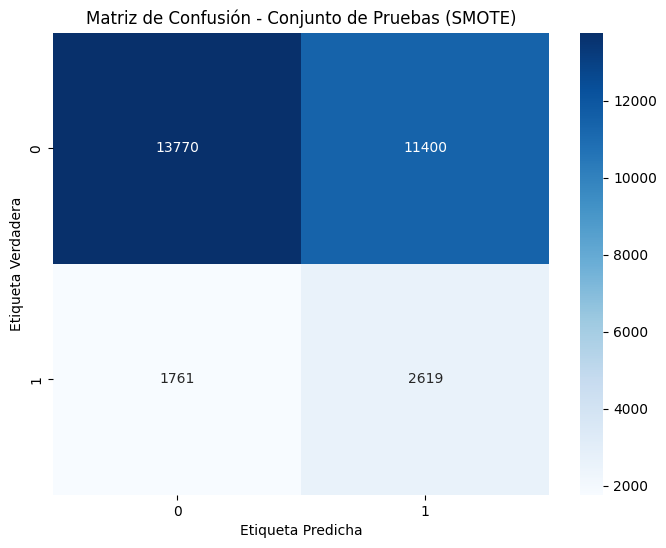

In [130]:

# Aplicar SMOTE al conjunto de datos
sm = SMOTE(random_state=100)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Dividir los datos resampleados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=100)

# Construir el modelo de regresión logística
model = LogisticRegression(random_state=100)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_resampled = model.predict(X_test1)

# Calcular la matriz de confusión para el conjunto de pruebas
cm_test_smote = confusion_matrix(y_test1, y_pred_resampled)

# Evaluar el modelo
accuracy = accuracy_score(y_test1, y_pred_resampled)
precision = precision_score(y_test1, y_pred_resampled, pos_label=1)
recall = recall_score(y_test1, y_pred_resampled, pos_label=1)
f1 = f1_score(y_test1, y_pred_resampled, pos_label=1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


# Crear el heatmap de la matriz de confusión
# Definir etiquetas para los ejes

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Conjunto de Pruebas (SMOTE)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()





#### 9.2.3 Modelo de KNN

In [131]:


for k in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, y_train1)
    
    y_pred_KNN = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_KNN)
    

    print("Accuracy for K =", k, ":", accuracy)

Accuracy for K = 2 : 0.6024747264096606
Accuracy for K = 3 : 0.6679377941965083
Accuracy for K = 4 : 0.5677967784861666
Accuracy for K = 5 : 0.6017199944388171
Accuracy for K = 6 : 0.5459889968023198
Accuracy for K = 7 : 0.5663071759121333
Accuracy for K = 8 : 0.5329202168861348
Accuracy for K = 9 : 0.5437843849927506


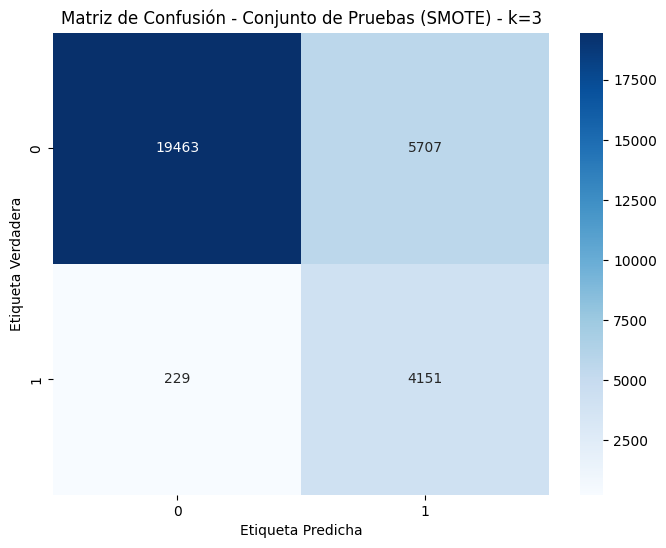

k=3
Accuracy: 0.7991201353637902
Precision: 0.42107932643538243
Recall: 0.9477168949771689
F1 score: 0.5830875122910522
---------------------------------
Resumen de métricas:
k=3: Accuracy=0.7991201353637902, Precision=0.42107932643538243, Recall=0.9477168949771689, F1 score=0.5830875122910522


In [132]:

# Crear listas para almacenar las métricas de evaluación
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Valor de k
k = 3

# Entrenar el modelo con k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred_KNN = knn.predict(X_test1)

# Calcular la matriz de confusión
cm_test_smote = confusion_matrix(y_test1, y_pred_KNN)

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_smote, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusión - Conjunto de Pruebas (SMOTE) - k={k}')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Evaluar el modelo
accuracy = accuracy_score(y_test1, y_pred_KNN)
precision = precision_score(y_test1, y_pred_KNN, pos_label=1)
recall = recall_score(y_test1, y_pred_KNN, pos_label=1)
f1 = f1_score(y_test1, y_pred_KNN, pos_label=1)

# Almacenar las métricas
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

# Imprimir las métricas para k=3
print(f'k={k}')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('---------------------------------')

# Resumen de métricas para k=3
print('Resumen de métricas:')
print(f'k={k}: Accuracy={accuracies[0]}, Precision={precisions[0]}, Recall={recalls[0]}, F1 score={f1_scores[0]}')


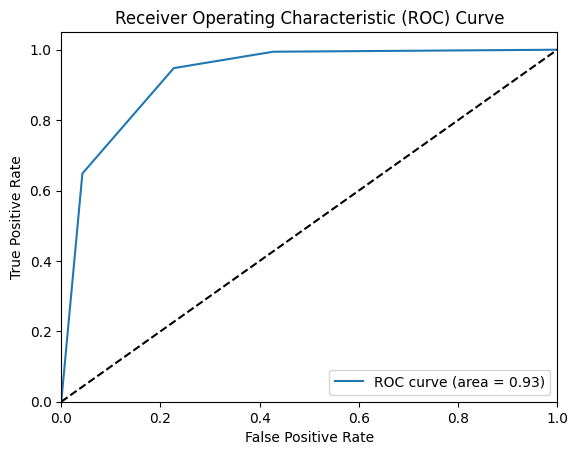

In [133]:
# Definir el número de vecinos
K = 3

# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred_KNN = knn.predict(X_test1)

# Calcular las probabilidades predichas de cada clase
y_prob= knn.predict_proba(X_test1)

# Calcular la curva ROC para la clase 1 (clase positiva)
fpr, tpr, thresholds = roc_curve(y_test1, y_prob[:, 1])

# Calcular el AUC (Area Under the Curve)
auc = roc_auc_score(y_test1, y_prob[:, 1])

# Graficar la curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal para referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### 9.2.4 Modelo de Random Forest Classifier con SMOTE

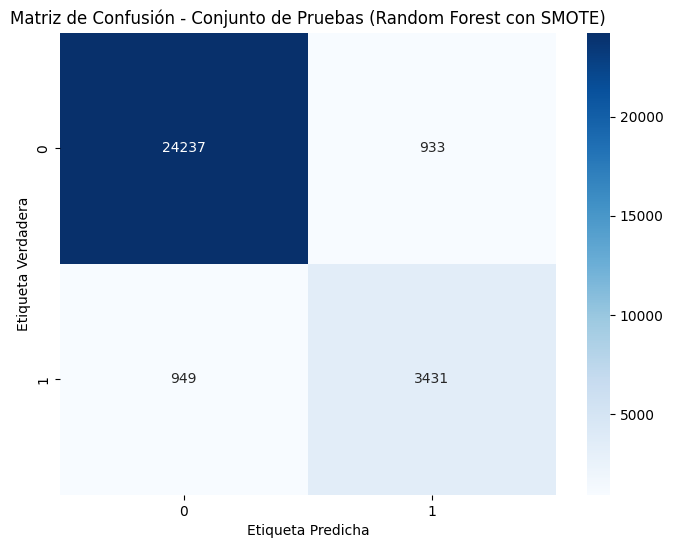

Random Forest Classifier con SMOTE
Accuracy: 0.936311336717428
Precision: 0.786205316223648
Recall: 0.7833333333333333
F1 score: 0.7847666971637695


In [134]:

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar el modelo con los datos resampleados
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones utilizando el conjunto de prueba (X_test1)
y_pred_RF = rf.predict(X_test1)

# Calcular la matriz de confusión
cm_test_rf = confusion_matrix(y_test1, y_pred_RF)

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Conjunto de Pruebas (Random Forest con SMOTE)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Evaluar el modelo
accuracy = accuracy_score(y_test1, y_pred_RF)
precision = precision_score(y_test1, y_pred_RF, pos_label=1)
recall = recall_score(y_test1, y_pred_RF, pos_label=1)
f1 = f1_score(y_test1, y_pred_RF, pos_label=1)

# Imprimir las métricas
print('Random Forest Classifier con SMOTE')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


- Métricas:

Precisión: 0.7862, lo que indica que el 78.62% de las instancias predichas como positivas fueron realmente positivas.

Recall: 0.7833, indicando que el 78.33% de las instancias de la clase positiva fueron correctamente identificadas.

F1 Score: 0.7847, lo que muestra un buen equilibrio entre precisión y recall.

Exactitud: 0.9363, indicando un rendimiento general muy alto del modelo.

##### Random Forest con validación cruzada estratificada de 5 pliegues

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Crear el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Definir la validación cruzada con 5 "folds" (puedes ajustar el número según prefieras)
cv = StratifiedKFold(n_splits=5)

# Realizar la validación cruzada y calcular el puntaje de exactitud (accuracy)
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

# Mostrar los resultados
print(f"Puntajes de validación cruzada: {cv_scores}")
print(f"Promedio del puntaje de validación cruzada: {np.mean(cv_scores)}")


Puntajes de validación cruzada: [0.85055838 0.79253807 0.82558376 0.74817259 0.84511904]
Promedio del puntaje de validación cruzada: 0.8123943666907774


- Validación Cruzada:

El modelo fue evaluado con validación cruzada usando 5 "folds", lo que permite obtener una estimación más robusta de su rendimiento.
Los puntajes de validación cruzada varían entre 0.7482 y 0.8506, con un promedio de 0.8124.
 
Esto sugiere que el modelo mantiene un rendimiento consistente y robusto a través de diferentes subconjuntos de datos.

##### Random Forest Classifier con análisis de importancia de características.

                Feature  Importance
2  location.postal_code    0.200146
5                    km    0.168064
7                 price    0.162636
1         location.city    0.116049
0                 model    0.110421
6            horsepower    0.092541
4                  year    0.077482
3                 brand    0.072661


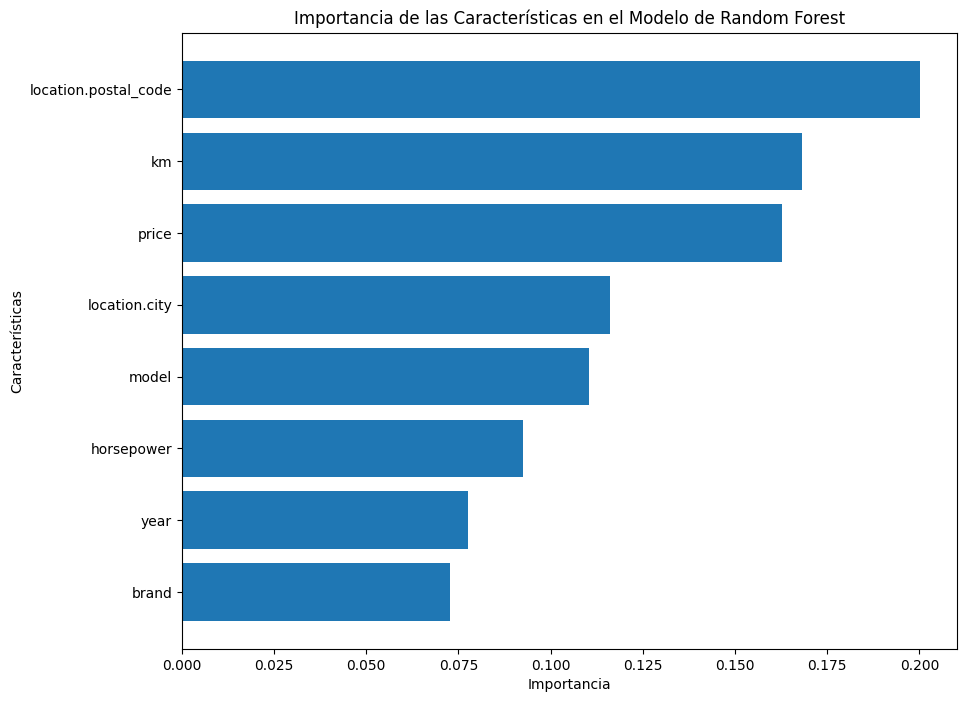

In [136]:
# Entrenar el modelo en todo el conjunto de datos
rf.fit(X, y)

# Obtener la importancia de las características
importances = rf.feature_importances_

# Crear un DataFrame para facilitar la visualización
feature_names = X.columns  
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordenar las características por importancia descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(importance_df.head(10))  # Muestra las 10 características más importantes

# Graficar la importancia de las características
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características en el Modelo de Random Forest')
plt.gca().invert_yaxis()  # Dar la vuelta para que las características más importantes estén arriba
plt.show()


- Importancia de las Características:

La importancia de las características sugiere que "location.postal_code", "km", y "price" son los atributos más importantes para el modelo. 
Esto implica que la ubicación, el kilometraje y el precio del vehículo son los factores más determinantes en la predicción.
Otras características como "location.city", "model", y "horsepower" también tienen importancia, aunque en menor medida.

#### Conclusiones sobre el modelo:
Tras ver los resultados de los modelos, elegimos el modelo Randon Forest con SMOTE, respector a KNN.
- El modelo Random Forest con SMOTE ha mostrado un buen rendimiento en términos de precisión y recall, manejando bien el desequilibrio en las clases.
- La validación cruzada confirma la robustez del modelo, con un rendimiento estable a través de distintos conjuntos de datos.
- La importancia de las características revela que el código postal, el kilometraje y el precio son los factores clave en la predicción.